<a href="https://colab.research.google.com/github/akshaysom21/Flipkart-Customer-Support-Data-Analysis/blob/main/Flipkart_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **Flipkart Customer Support Data Analysis**

Project Type - Classification
#### Contribution - Individual (**Akshay Som**)


## **Project Summary -**

### **Objective:**

The aim of this project is to develop a classification model to predict customer satisfaction scores for Flipkart. This predictive model will help the company identify areas for improvement in customer experience and optimize their marketing and service strategies, ultimately enhancing customer retention and satisfaction.

### **Dataset Overview:**

The dataset comprises 20 columns, with several features showing a strong correlation to customer behavior. Key customer-related variables includes `Order_ID`, `Order_date_time`, `Customer_City`, `Item_Price`, `Channel_Name`, and `Customer_Remarks`. Additionally, key operational variables include `Issue_Responded_at`, `Issue_Responded`, `Survey_Response_Date`, `Product_Category`, `Agent_Name`, `Supervisor`, `Manager`, `Agent_Shift`, and `Sub_Category`. The target variable is the `CSAT Score`, which ranges from 1 to 5, indicating customer satisfaction—higher scores reflect greater satisfaction.

### **Data Manipulation:**

The date variables were converted from object type to datetime format for improved processing. The Connected_Handling_Time column was removed due to having 99% of its values as null. Additionally, any rows with null values in the `Order_ID` column were eliminated. To address missing data, null values in categorical columns, including `Customer_City`, `Customer_Remarks`, and `Product_Category`, as well as in numeric columns like `Item_Price`, `Issue_Reported_at`, and `Issue_Responded`, were filled appropriately.

### **Exploratory Data Analysis (EDA):**

The EDA phase involved a comprehensive exploration of the dataset to uncover trends, patterns and relationships that could inform the model-building process.

### **Data Cleaning and Preparation:**

Handling Missing Data: The dataset was evaluated for missing values, and suitable imputation strategies were implemented to maintain data integrity.

### **Feature Engineering:**

Data Types: The year, month, day, hour, and minute were extracted from the `Order_Date_Time` column to derive additional valuable insights.
Outliers: The `Item_Price` column was analyzed for outliers using the IQR method, leading to the removal of 23.85% of data points that fell outside acceptable limits.
Encoding: One-Hot Encoding was applied to categorical features such as `Channel_name` and `Product_Category`.


### **Univariate Analysis:**

Histograms and box plots were employed to analyze the distribution of continuous variables like `Item_price` and `CSAT Score`.

### **Data Splitting:**

The data was split into training and test sets with an 80-20 ratio. Several classification models were trained, including Logistic Regression, Decision Trees, Random Forest, kNeighbors and Extratrees classifier. Hyperparameter tuning was performed, focusing on F1-Score as the primary evaluation metric to balance precision and recall.

### **Model Evaluation:**

The models were evaluated using Precision, Recall, F1-Score, and Accuracy. The Extra trees model exhibited the best performance, particularly in terms of precision and accuracy, making it the model of choice.
The confusion matrix and ROC-AUC curve further supported the model's effectiveness in distinguishing between satisfied and dissatisfied customers.
Feature Importance:

The model identified `Customer_Remarks`, `issue_responded`, `Channel_name` and `category` as the most significant factors influencing customer satisfaction. This suggests that `Customer_Remarks`, `issue_resoponded` are crucial for enhancing customer satisfaction.

### **Conclusion:**

The final model successfully predicts customer satisfaction scores with high precision. This model can be deployed to enhance Flipkart's customer experience initiatives, ensuring that resources are allocated to customers with the highest potential for satisfaction. Insights from feature importance analysis can guide strategic decisions in marketing and service improvements.

## **Problem Statement**

### **Predicting Flipkart Customer Satisfaction Scores Using Predictive Analytics and Machine Learning**

### **Context:**
In the highly competitive e-commerce industry, customer satisfaction is a critical determinant of brand loyalty and long-term growth. As one of the largest e-commerce platforms, Flipkart handles millions of customer interactions across various support channels such as email, phone, live chat, and social media. Maintaining high levels of customer satisfaction is essential for retaining customers and enhancing their shopping experience. Understanding the factors that influence customer satisfaction and being able to predict CSAT scores based on these factors can significantly improve Flipkart's customer service performance and help in optimizing resources.

### **Objective:**
The primary objective of this project is to develop a machine learning model that can predict customer satisfaction scores (CSAT) based on historical customer interaction data. By analyzing different features such as customer demographics, interaction types, issue resolution times, support channel performance, and agent efficiency, the model will identify the key drivers of customer satisfaction and provide actionable insights for improving the overall customer service experience. The target variable is the CSAT score, which reflects the satisfaction level of customers after interacting with Flipkart's support team.

### **Key Challenges:**
a) Data Imbalance: The dataset may contain an imbalanced distribution of high and low satisfaction scores, which can lead to biased predictions. Addressing this issue with techniques like oversampling, undersampling, or advanced algorithms will be crucial.

b) Feature Engineering: Accurately capturing the drivers of customer satisfaction will require careful feature engineering. This may involve creating new features related to agent performance, interaction duration, issue complexity, and support channel usage to improve model accuracy.

c) Multichannel Integration: Customer interactions occur across different support channels (e.g. inbound, outcall, email). Integrating and normalizing these interactions for model input poses a challenge, especially when data comes in different formats and volumes from each channel.

d) Scalability: Given the high volume of customer interactions, the model needs to be scalable to handle large datasets in real-time scenarios while maintaining prediction accuracy.

e) Model Evaluation: Since the goal is to accurately predict satisfaction levels, precision, recall, and F1-score metrics will be essential in evaluating the model’s performance, with a particular focus on avoiding false negatives (i.e., predicting high satisfaction when the customer is actually dissatisfied).

### **Deliverables:**
A machine learning model capable of predicting customer satisfaction (CSAT) based on customer interaction data.

A detailed report on data preprocessing steps, feature engineering, model selection, evaluation metrics, and key insights derived from the analysis.

### **Business Impact:**
By accurately predicting customer satisfaction, Flipkart can prioritize high-risk customers and take proactive measures to resolve potential issues before they escalate. The insights generated from the model will allow Flipkart to optimize its customer support processes, such as allocating more resources to underperforming channels, rewarding high-performing agents, and customizing support strategies for different customer segments. Ultimately, improving CSAT scores will enhance brand loyalty, reduce customer churn, and drive higher customer retention rates, contributing to Flipkart’s long-term success in the competitive e-commerce market.

## **1. Data Loading & Overview**

### **Import Libraries**

In [ ]:
# Importing Data Framework Libraries.
import pandas as pd
import numpy as np

# Importing warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Train Test Split
from sklearn.model_selection import train_test_split

# ML models libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, recall_score, classification_report, precision_score, f1_score, ConfusionMatrixDisplay

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Customer_support_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
# Dataset Rows & Columns count
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 85907
Number of columns: 20


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
# Percentage of null values

missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Unique id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks           66.542889
Order_id                   21.222950
order_date_time            79.962052
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
connected_handling_time    99.718300
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64


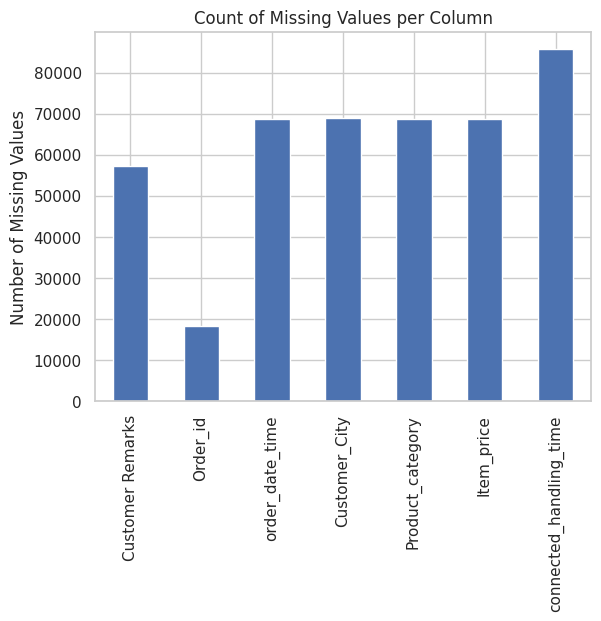

In [ ]:
# Visualizing the missing values

missing_counts = df.isnull().sum()
missing_counts[missing_counts > 0].plot(kind='bar')
plt.title('Count of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.show()

### **What did you know about your dataset?**

- **Rows and Columns:**  
  The dataset includes **85,907 rows** and **20 columns**.

- **Column Types:**  
  There is a mix of column types:
  - **Categorical:**  
    - `channelname`: Mode of support (e.g., Inbound, Outcall)
    - `category`: Main query category (Product Queries, Returns, Cancellation, etc.)
    - `Sub-category`, `Customer Remarks`, `Agentname`, `Supervisor`, `Manager`, `Tenure Bucket`, `Agent Shift`, etc.
  - **Numeric:**  
    - `CSAT Score` (integer, 1–5 range)
    - `resolutiontimehrs` (float, resolution time in hours—created through date feature engineering)
    - `Itemprice`, `connectedhandlingtime` (optional numeric columns)

- **Missing Values:**  
  - Some columns (e.g., `Customer Remarks`, `Orderid`, `Productcategory`, `Itemprice`, `connectedhandlingtime`, `CustomerCity`) have many missing values.
  - Core columns (`channelname`, `category`, `CSAT Score`, etc.) are mostly complete.

- **Duplicate Entries:**  
  - There are very few or no duplicate `Unique id` values (since it's a ticket ID), indicating each row represents a unique support interaction.

- **Feature Engineering:**  
  - `resolutiontimehrs`: A key derived feature using date columns to measure turnaround time for each ticket.
  - Categorical columns can be encoded for modeling.

- **General Data Characteristics:**  
  - Data is diverse: covers multiple ticket categories, agent performance, time buckets, and shifts.
  - Suitable for time-series, agent-level, and category-based analysis.


## **2. Understanding Your Variables**




**Variables Description**

- **Unique id**:  
  Unique identifier for each customer support ticket/interaction (string).

- **channelname**:  
  Customer contact method, such as Inbound, Outcall (categorical; captures whether the query was initiated by the customer or by Flipkart).

- **category**:  
  Type of inquiry or ticket, for example: Product Queries, Returns, Cancellation, Order Related, Complaint, etc. (categorical).

- **Sub-category**:  
  More granular reason for the ticket (e.g., Life Insurance, Product Specific Information, Installationdemo, etc.).

- **Customer Remarks**:  
  Free text remarks or comments left by the customer.

- **Orderid**:  
  Identifier for the relevant order, if present (may be missing for general queries).

- **orderdatetime**:  
  Timestamp when the order was placed (object or datetime).

- **Issuereported at**:  
  Date and time when the issue was reported by the customer (string or datetime, e.g., "01082023 1113").

- **issueresponded**:  
  Date and time when the issue was responded to by support.

- **SurveyresponseDate**:  
  Date of CSAT survey response collection.

- **CustomerCity**:  
  Customer’s city (helps in geographic analysis).

- **Productcategory**:  
  Product category for which the ticket was raised (can be missing for general queries).

- **Itemprice**:  
  Price of the item related to the ticket (float).

- **connectedhandlingtime**:  
  The duration the agent spent handling the ticket (float, substantial missingness).

- **Agentname/Supervisor/Manager**:  
  Agent, supervisor, and manager responsible for the ticket (for agent-level analytics).

- **Tenure Bucket**:  
  Grouping or experience level of the agent (banded as "On Job Training", "90", "0-30", ">90", etc.).

- **Agent Shift**:  
  Shift during which the agent resolved the ticket (Morning, Evening, Afternoon, Night, Split).

- **CSAT Score**:  
  Customer Satisfaction Score—outcome variable, integer from 1 (worst) to 5 (best).

In [ ]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
print(df.describe())

          Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000


In [ ]:
# Overview of unique values per column
for col in df.columns:
    print(col, df[col].nunique())

Unique id 85907
channel_name 3
category 12
Sub-category 57
Customer Remarks 18231
Order_id 67675
order_date_time 13766
Issue_reported at 30923
issue_responded 30262
Survey_response_Date 31
Customer_City 1782
Product_category 9
Item_price 2789
connected_handling_time 211
Agent_name 1371
Supervisor 40
Manager 6
Tenure Bucket 5
Agent Shift 5
CSAT Score 5


## **3. Data Wrangling**
- Filled missing numeric data with mean value.
- Removed severe outliers in ticket resolution time to focus on operationally realistic data.


In [ ]:
# Before Doing any manipulation and Data wrangling task on data set we will make a copy of the original data set
fk_df = df.copy()

In [ ]:
# Checking the new data set after creating a copy.
fk_df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
fk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
# Since the connected handling time colum has 99 % of null values we will drop the whole column.
fk_df = fk_df.drop('connected_handling_time', axis = 1)

In [ ]:
# Removing null rows from Order_id Column.
fk_df = fk_df.dropna(subset=['Order_id'])

In [ ]:
# Converting Order_date_time Columnn from object to datetime format.
fk_df['order_date_time'] = pd.to_datetime(fk_df['order_date_time'],format='%d/%m/%Y %H:%M', errors = 'coerce')

In [ ]:
# Converting Issue_reported_at Column from object to datetime format.
fk_df['Issue_reported at'] = pd.to_datetime(fk_df['Issue_reported at'],format ='%d/%m/%Y %H:%M', errors = 'coerce')

In [ ]:
# Converting issue_responded Column from object to datetime format.
fk_df['issue_responded'] = pd.to_datetime(fk_df['issue_responded'], format = '%d/%m/%Y %H:%M', errors = 'coerce')

In [ ]:
# Converting Survey_response_Date Column from object to datetime format.
fk_df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], format='%d-%b-%y', errors='coerce')

In [ ]:
# Sum of Null values of Customer Remarks column.
fk_df['Customer Remarks'].isnull().sum()
print(f"Sum of Null values of Customer Remarks Column: {fk_df['Customer Remarks'].isnull().sum()}")

Sum of Null values of Customer Remarks Column: 45036


In [ ]:
# Since Customer Remarks column has 57165 null values and it is crucial in terms of building a customer satisfication model.
# Hence instead of dopping null rows we will fill the null values with 'NA' as remarks.
fk_df['Customer Remarks'].fillna('NA',inplace=True)

In [ ]:
# Replace occurrences of 'good??' with 'good'
fk_df['Customer Remarks'] = fk_df['Customer Remarks'].replace('good??', 'good')

In [ ]:
# Since Customer Remarks has duplicates values we will strip
fk_df['Customer Remarks'] = fk_df['Customer Remarks'].str.lower().str.strip()

In [ ]:
# Sum of order date time column null values
print(f"Sum of null values in order_date_time column is {fk_df['order_date_time'].isnull().sum()}")

Sum of null values in order_date_time column is 50461


In [ ]:
# Since order_date_time has 68693 Null values we will group by the column with Survey response Date to fill the Null values.
fk_df['order_date_time'] = fk_df.groupby('Survey_response_Date')['order_date_time'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Extracting various date and time components from the 'order_date_time' column
fk_df['day'] = fk_df['order_date_time'].dt.day_name()
fk_df['year'] = fk_df['order_date_time'].apply(lambda x: x.year)
fk_df['month_num'] = fk_df['order_date_time'].apply(lambda x: x.month)
fk_df['day_num'] = fk_df['order_date_time'].apply(lambda x: x.day)
fk_df['hour'] = fk_df['order_date_time'].apply(lambda x: x.hour)
fk_df['minute'] = fk_df['order_date_time'].apply(lambda x: x.minute)
fk_df['month'] = fk_df['order_date_time'].dt.month_name()

In [ ]:
# Percentage of null values in the Customer_city Column
missing_count = fk_df['Customer_City'].isna().sum()
total_count = len(fk_df)
missing_percentage = (missing_count / total_count) * 100

In [ ]:
print(f"Percentage null values of customer city column is: {round(missing_percentage,2)} %")

Percentage null values of customer city column is: 74.76 %


In [ ]:
fk_df['Customer_City'].isnull().sum()
print(f"Sum of Null values of Customer_City Column: {fk_df['Customer_City'].isnull().sum()}")

Sum of Null values of Customer_City Column: 50596


In [ ]:
# Filling Null values of Customer_City Column.
fk_df['Customer_City'].fillna('Not Given', inplace=True)

In [ ]:
# Sum of Null values of Product_catgory.
fk_df['Product_category'].isnull().sum()
print(f"Sum of Null values of Product_category Column: {fk_df['Product_category'].isnull().sum()}")

Sum of Null values of Product_category Column: 50479


In [ ]:
# Filling Null values of Product_category Column.
fk_df['Product_category'].fillna('Not Available', inplace = True)

In [ ]:
# Checking null values of item price column.
fk_df['Item_price'].isnull().sum()
print(f"Sum of Null values of Item_price Column: {fk_df['Item_price'].isnull().sum()}")

Sum of Null values of Item_price Column: 50469


In [ ]:
# Filling Null values of Item_price Column.
fk_df['Item_price'].fillna(0, inplace = True)

### **What all manipulations have you done and insights you found?**

1. I first created a copy of the original dataset named `fk_df` for data wrangling and manipulation tasks.
2. After creating the copy, I visualized columns with null values by plotting a bar graph.
3. The `connected_handling_time` column had 99% missing values, so I dropped the entire column.
4. The `order_date_time` column had 50,461 missing values. I applied median imputation to fill these missing values, grouping by the `Survey_response_date` column. This method helps ensure more accurate imputations based on the grouping.
5. To gain additional insights from the dataset, I extracted the day, year, month number, day number, hour, minute, and month name from the `order_date_time` column.
6. The `order_id` column contained null values, and I removed the rows with missing data.
7. I converted the data types of columns such as `order_date_time`, `Issue_reported at`, `issue_responded`, and `Survey_response_Date` from object to datetime format.
8. For columns with null values, I filled them with placeholders.
9. I replaced null values in the `Item_price` column with 0.
10. The `Customer_Remarks` column had duplicate values for remarks like "Good," so I stripped the variables to handle these duplicates.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **Chart - 1**

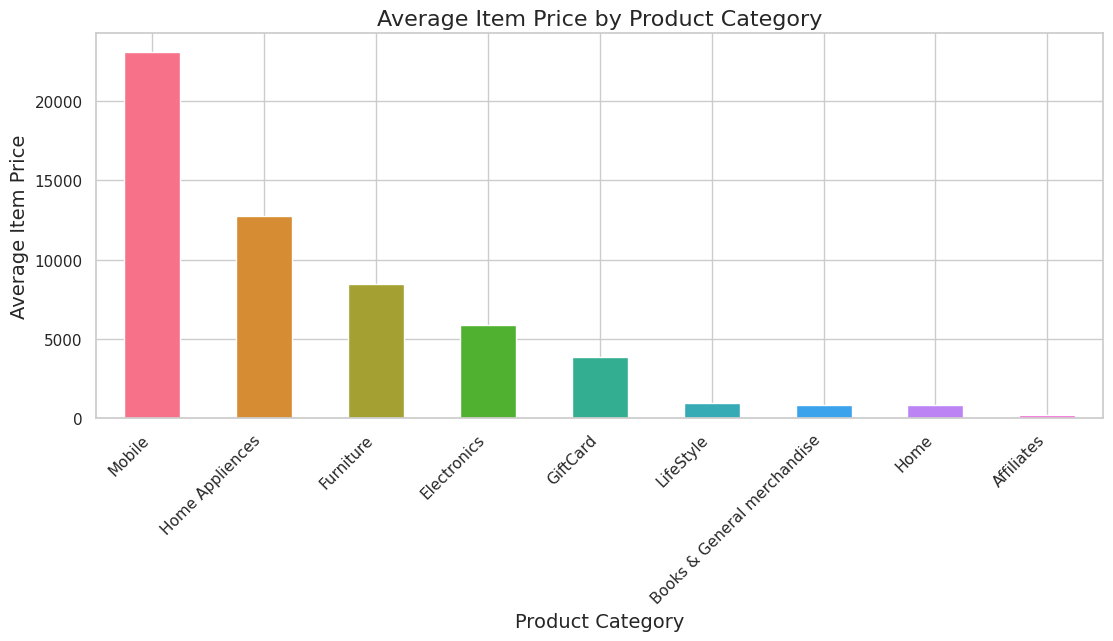

In [ ]:
# Chart - 1 visualization code

# Filtering out rows where Product_category is 'Not Available'
filtered_fk_df = fk_df[fk_df['Product_category'] != 'Not Available']

average_price = filtered_fk_df.groupby('Product_category')['Item_price'].mean().sort_values(ascending=False)

# Figure size
plt.figure(figsize=(13, 5))

colors = sns.color_palette("husl", len(average_price))
average_price.plot(kind='bar', color=colors)

plt.title('Average Item Price by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Item Price', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

#### **1. Why did you pick the specific chart?**

I selected the bar chart to display the average item price across different product categories.

#### **2. What is/are the insight(s) found from the chart?**

The chart shows that the average price for mobiles is ₹23,000, while home appliances average ₹12,000. Furniture averages ₹8,000. Mobiles have the highest average price, followed by home appliances, with furniture in third place.

#### **3. Will the gained insights help creating a positive business impact?**
#### **Are there any insights that lead to negative growth? Justify with specific reason.**

The insights highlight that higher-value categories like mobiles and home appliances contribute significantly to revenue, aiding targeted marketing and sales strategies. However, the lower average price for furniture could indicate potential issues with profitability or consumer interest. Addressing this through promotions or improved offerings could enhance growth in that category.

### **Chart - 2**

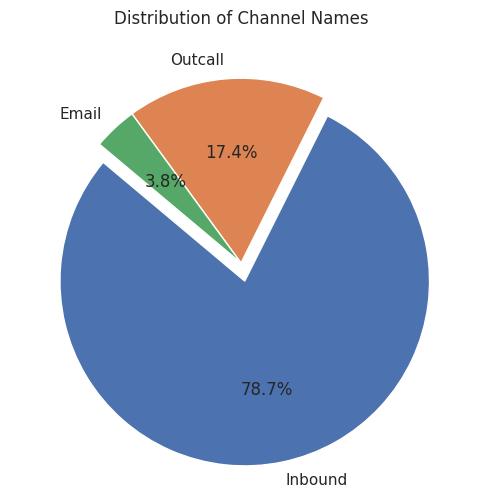

In [ ]:
# Chart - 2 visualization code

# Calculate value counts and the most frequent channel
channel_counts = fk_df['channel_name'].value_counts()
most_frequent_channel = fk_df['channel_name'].mode()[0]

explode = [0.1 if label == most_frequent_channel else 0 for label in channel_counts.index]

plt.figure(figsize=(10, 6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Distribution of Channel Names')
plt.show()

#### **1. Why did you pick the specific chart?**

I selected the pie chart to illustrate the distribution of various communication channels.

#### **2. What is/are the insight(s) found from the chart?**

By plotting the pie chart, I discovered that Inbound accounts for approximately 78.7% of the distribution, followed by Outcall at 17.4%, while Email has the smallest share at 3.8%.

#### **3. Will the gained insights help creating a positive business impact?**
#### **Are there any insights that lead to negative growth? Justify with specific reason.**

The insights gained can significantly benefit the business by identifying the primary channels where most customer interactions take place, such as Inbound and Outcall. This allows the company to allocate resources more effectively to these high-traffic channels, enhancing operational efficiency and customer experience. Conversely, the lower preference for the email channel indicates a potential area of concern, as it may negatively impact the business by not meeting customer expectations in this medium.

### **Chart - 3**

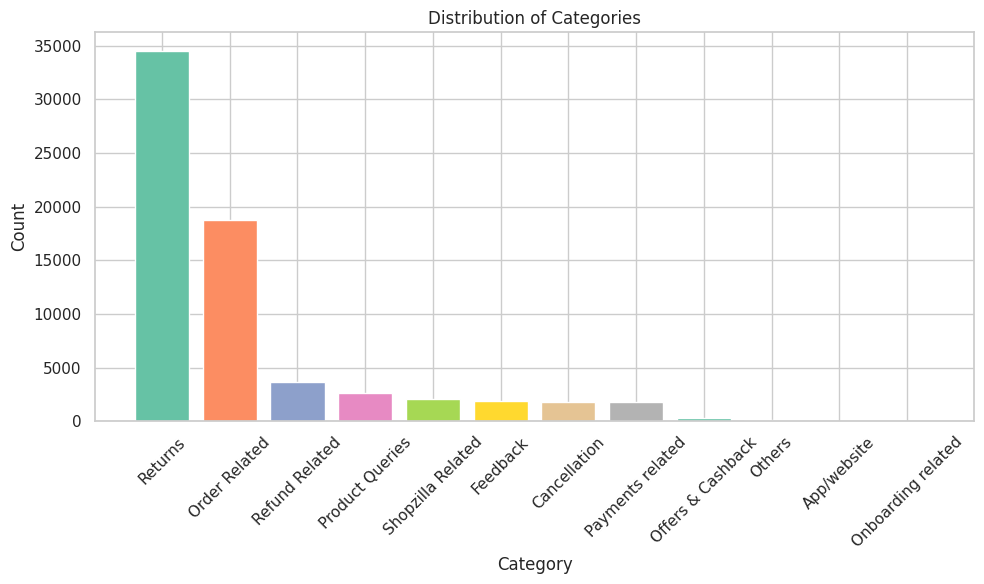

In [ ]:
# Chart - 3 visualization code

category_counts = fk_df['category'].value_counts()

plt.figure(figsize=(10, 6))

# Plotting a histogram (bar chart) to show the count of each category
plt.bar(category_counts.index, category_counts, color=plt.cm.Set2.colors)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **1. Why did you pick the specific chart?**

I chose a bar chart to display the distribution of the different categories.

#### **2. What is/are the insight(s) found from the chart?**

The bar chart indicates that the "Return" category has the highest count, with more than 30,000 occurrences. The "Order-related" category follows with over 15,000, while the "Refund-related" category has around 5,000.

#### **3. Will the gained insights help creating a positive business impact?**
#### **Are there any insights that lead to negative growth? Justify with specific reason.**

The insights can drive positive business impact by highlighting areas for improvement, like addressing high return rates to boost customer satisfaction. However, the high number of returns and order-related issues could indicate problems with product quality or fulfillment processes, potentially leading to customer dissatisfaction and revenue loss if not resolved.

#### Chart - 4

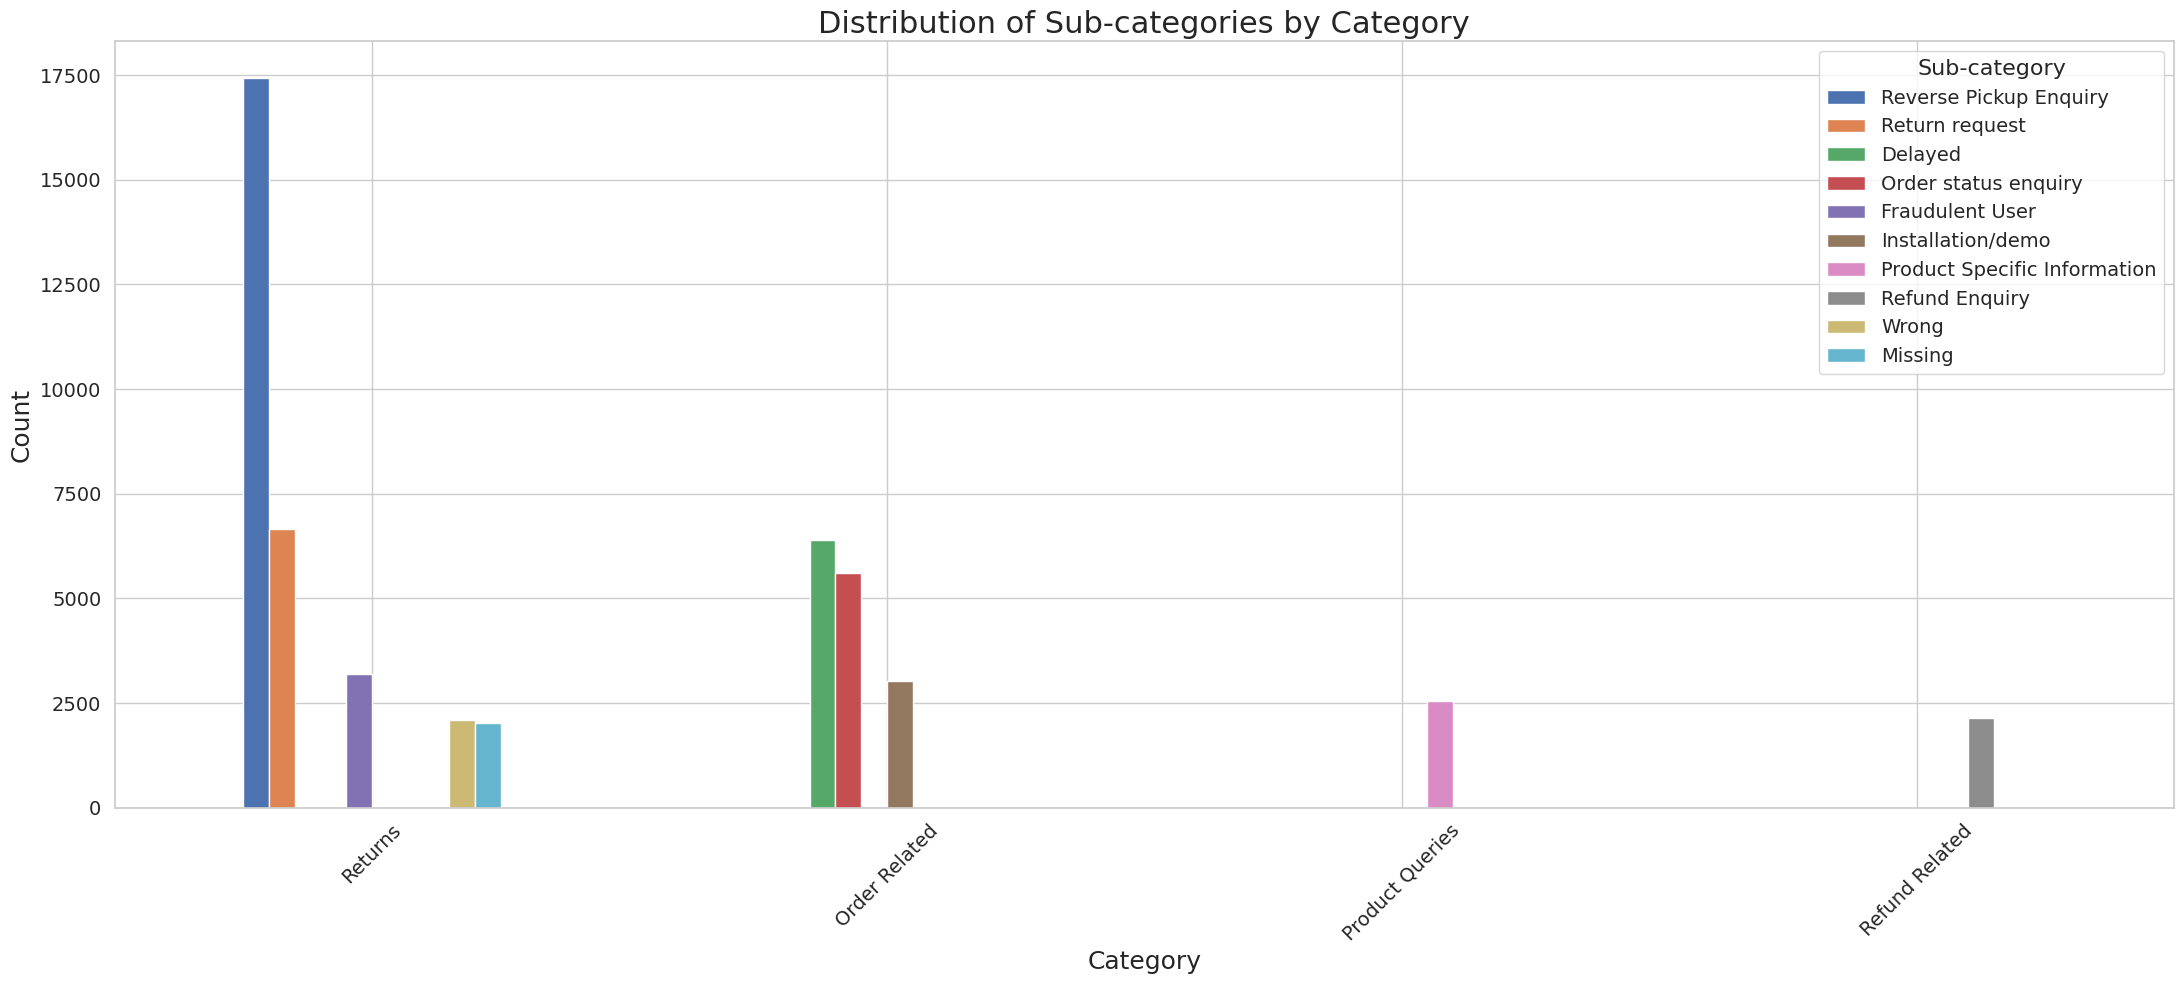

In [ ]:
# Chart - 4 visualization code
category_sub_category_distribution = fk_df.groupby('category')['Sub-category'].value_counts().nlargest(10)

category_sub_category_distribution.unstack().plot(kind='bar', stacked=False, figsize=(22, 10))

plt.xlabel('Category', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of Sub-categories by Category', fontsize=22)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Sub-category', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to display the counts of the top 10 sub-categories, grouped by their respective categories. This visualization effectively highlights the frequency of each sub-category within its category, providing a clearer view of their distribution across different categories.

##### 2. What is/are the insight(s) found from the chart?

The bar chart illustrates the distribution of sub-categories within each main category, highlighting that "Returns" has the highest frequency, indicating a major area of concern. This is followed by "Reverse Pickup Enquiry" and "Return Request," suggesting significant customer interaction in these areas as well. Understanding these patterns can help the business prioritize resources and develop targeted strategies to address common issues, ultimately improving customer satisfaction and operational efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, focusing on the "Returns" category and high counts for "Reverse Pickup Enquiry" and "Return Request" allows the business to address key areas, improve customer satisfaction, and reduce operational costs.

High return volumes could indicate issues with product quality or customer dissatisfaction, potentially increasing costs and straining resources. Addressing these problems is crucial to avoid negative growth.

#### Chart - 5

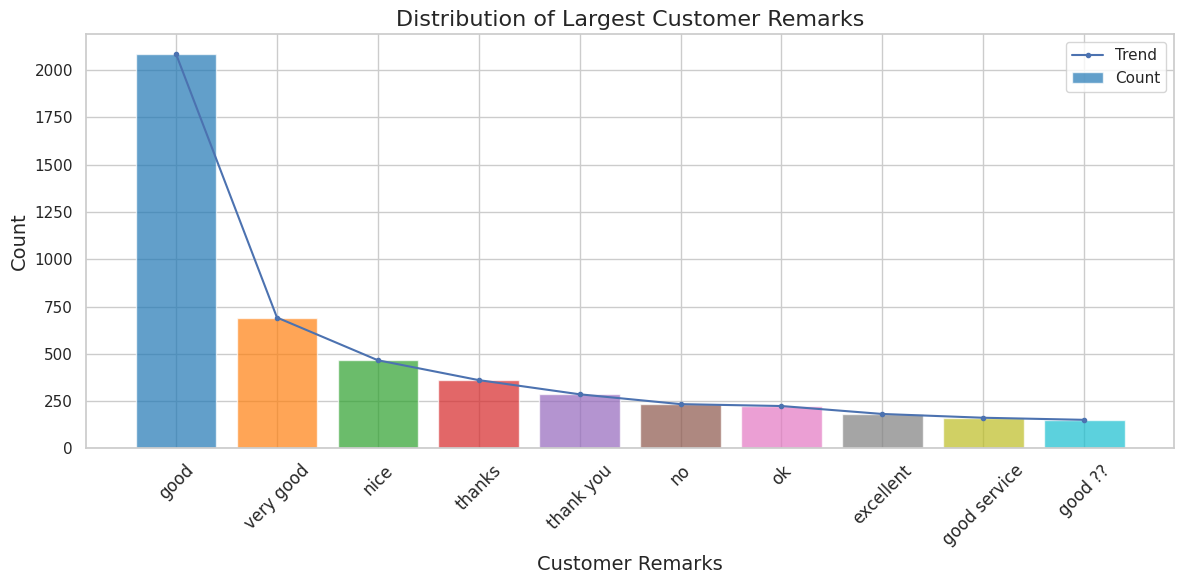

In [ ]:
# Chart - 5 visualization code

customer_remarks = fk_df['Customer Remarks'].value_counts()
# Filtering out 'na' values
customer_remarks = customer_remarks[customer_remarks.index != 'na']

largest_remarks = customer_remarks.nlargest(10)

# Generate colors for each bar
largest_colors = plt.cm.get_cmap('tab10', len(largest_remarks)).colors

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(largest_remarks.index, largest_remarks, color=largest_colors, alpha=0.7, label='Count')
plt.plot(largest_remarks.index, largest_remarks, marker='.', color='b', label='Trend')
plt.xlabel('Customer Remarks', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Largest Customer Remarks', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I have picked vertical bar chart to identify the count of customer remarks.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that "good" is the most common remark, with 2,000 occurrences, while "very good" has over 500 instances. This suggests an opportunity to enhance the feedback process, potentially encouraging more customers to share their experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The chart indicates that a large portion of customer feedback is positive, which can be used to showcase strengths and enhance customer satisfaction.

**Potential for Negative Growth:**

The less frequent remarks, such as "good service" and "excellent," suggest that many customers may not be fully satisfied, potentially indicating a lack of engagement or interest. This could reflect limited customer interaction or follow-up, which may negatively affect overall business performance and the quality of customer insights. Addressing this issue is crucial for improving feedback rates and gaining a clearer understanding of customer experiences.

#### Chart - 6

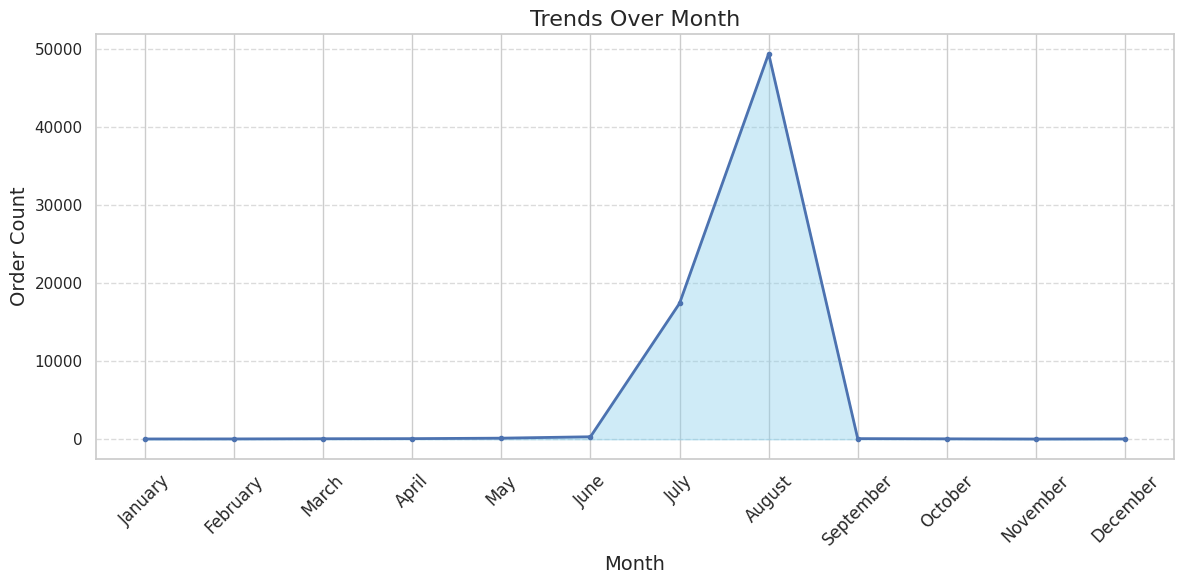

In [ ]:
# Chart - 6 visualization code

# Convert month to string/object instead of categorical if you don't want it to change
fk_df['month'] = fk_df['month'].astype('object')  # Ensure it's an object

# If you want to create an ordered plot without converting to categorical
# Just create a sorted list of months
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

# Group by month and count orders
trends_over_month = fk_df['month'].value_counts().reindex(ordered_months, fill_value=0)

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
plt.fill_between(trends_over_month.index, trends_over_month, color='skyblue', alpha=0.4)
plt.plot(trends_over_month.index, trends_over_month, marker='.', linestyle='-', color='b', linewidth=2)

# Plotting chart
plt.xlabel('Month', fontsize=14)
plt.ylabel('Order Count', fontsize=14)
plt.title('Trends Over Month', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# If it needs to be categorical again for some reason, convert it back after plotting
fk_df['month'] = fk_df['month'].astype('object')  # Convert back to object if needed


##### 1. Why did you pick the specific chart?

I had picked line chart to show the trends of order date time over months.

##### 2. What is/are the insight(s) found from the chart?

The line chart illustrates a noticeable surge in order bookings between June and August, with a particularly sharp increase leading into August. During this period, August stands out as the peak month with the highest volume of order bookings, indicating a strong seasonal trend or promotional influence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will certainly help in creating a positive business impact. The observed peak in order bookings from June to August highlights a key period of increased demand. By leveraging this information, businesses can focus their marketing efforts, promotional campaigns, and resource allocation during these months to maximize sales.

However, the insight that order bookings are only decent during the rest of the year, and do not match the high volumes seen between June and August, could be a concern for maintaining consistent growth. The relatively lower order bookings outside of this peak season may indicate periods of stagnation or slower business activity. If not addressed, these quieter periods could hinder overall annual growth.

### Chart - 7

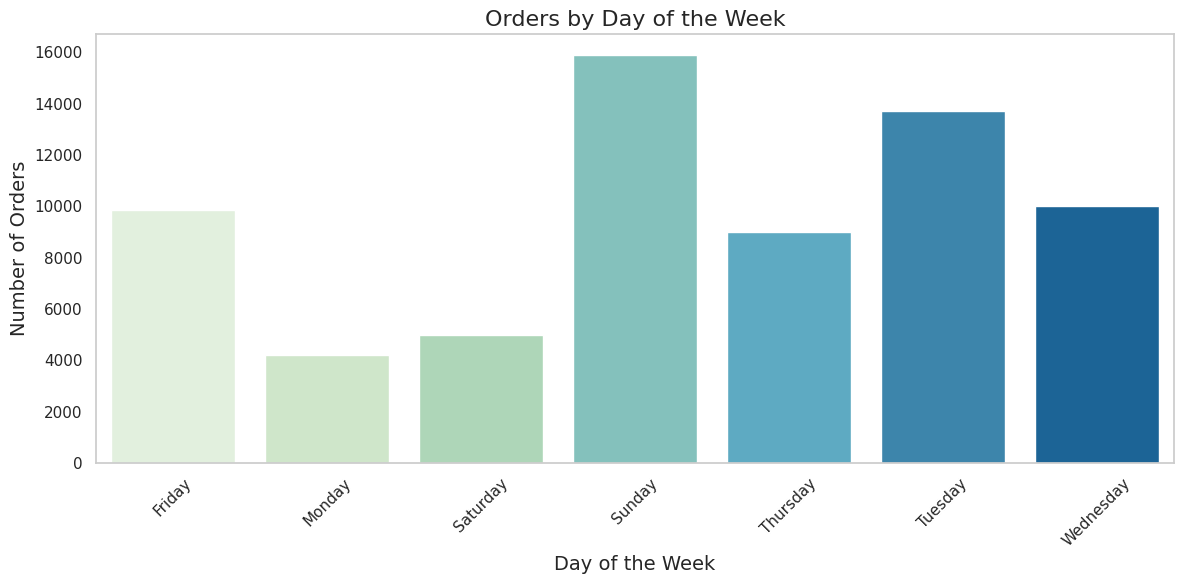

In [ ]:
# Chart - 7 visualization code
# Group by day and count orders
orders_day = fk_df.groupby('day')['Order_id'].count()

# Set the figure size correctly
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x=orders_day.index, y=orders_day.values, palette='GnBu')

# Customize the chart
plt.title('Orders by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was chosen to illustrate the number of orders placed on each day of the week.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that the highest volume of orders is recorded on Sunday, making it the most popular day for bookings. This is followed closely by Tuesday and Friday, which also show significant order counts. In contrast, Monday stands out as the day with the fewest bookings, highlighting a potential area for improvement in customer engagement at the start of the week.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can significantly enhance business outcomes. By identifying peak order periods, such as Sundays, businesses can tailor marketing strategies and optimize staffing to meet demand effectively.

However, low order counts on Mondays may indicate customer disengagement, suggesting a need to reevaluate promotional efforts for that day. Addressing these insights can lead to improved customer satisfaction and foster growth.


### Chart - 8

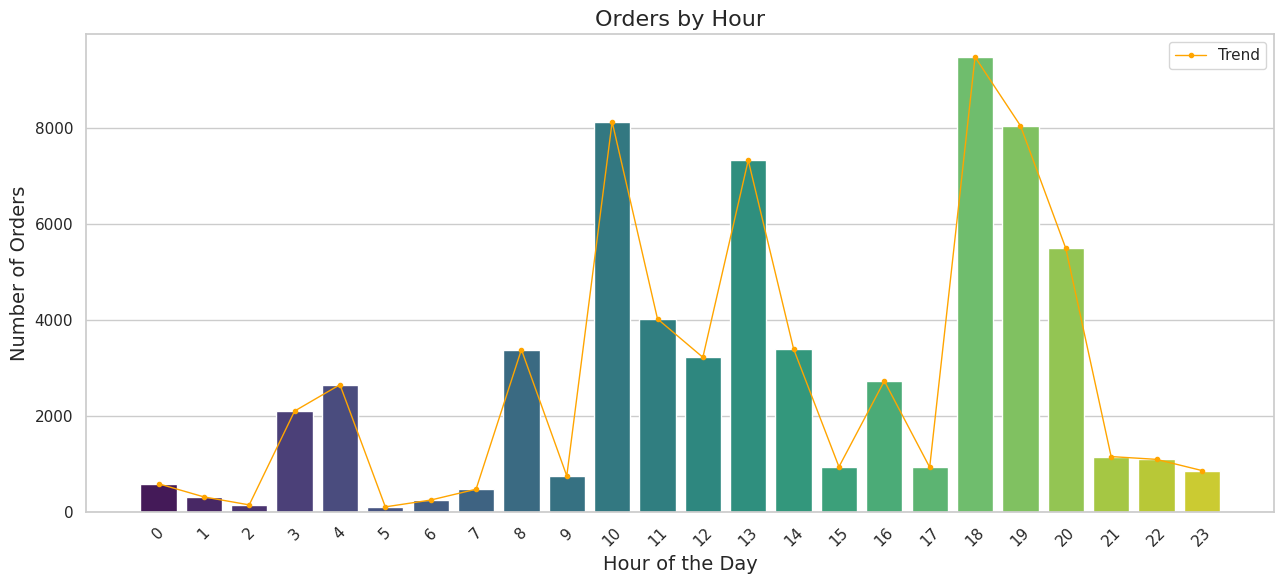

In [ ]:
# chart - 8 visualization code

# Grouping by day and count of orders
orders_day = fk_df.groupby('hour')['Order_id'].count()

plt.figure(figsize=(13, 6))

sns.barplot(x=orders_day.index, y=orders_day.values, palette='viridis')

plt.plot(orders_day.index, orders_day.values, color='orange', marker='.', linestyle='-', linewidth=1, label='Trend')

# Ploting chart
plt.title('Orders by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Add a legend to distinguish between bar and line
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


I selected a bar chart to analyze the trends in order placements over a 24-hour period.

##### 2. What is/are the insight(s) found from the chart?


The chart illustrates that the evening hours experience the highest volume of order placements, particularly peaking at 18:00. This time is notably the busiest for orders, followed closely by 10:00, 19:00, and 20:00, which also see significant activity. This trend underscores a customer tendency to place orders later in the day, indicating that targeting marketing efforts or promotions during these peak evening hours could effectively engage customers and enhance sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



The insights from the analysis of order placements indicate a potential for positive business impact. With peak order times identified in the evening, especially at 18:00, businesses can target marketing efforts and promotions during these hours to effectively engage customers and boost sales.

#### Chart - 7

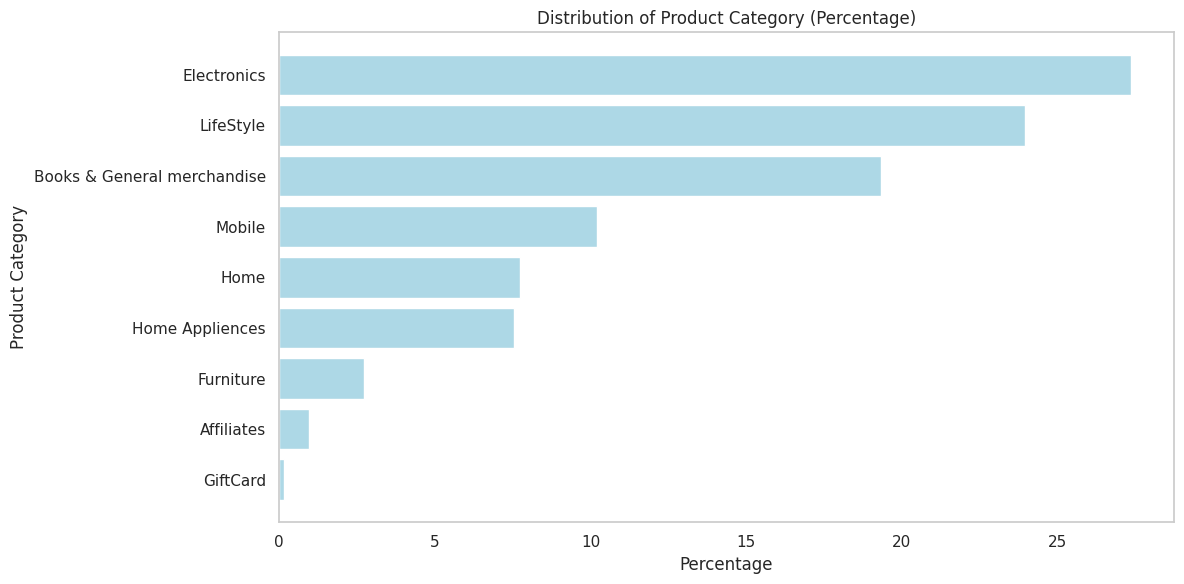

In [ ]:
# chart - 7 visualization code

# Calculating the distribution of product categories
product_category_dist = fk_df['Product_category'].value_counts()

# Filtering out 'Not Available'
product_category_dist = product_category_dist[product_category_dist.index != 'Not Available']

# Calculating the percentage distribution
percentage_distribution = (product_category_dist / product_category_dist.sum()) * 100

percentage_distribution = percentage_distribution.sort_values(ascending=True) # sorting in ascending order

plt.figure(figsize=(12, 6))
plt.barh(percentage_distribution.index, percentage_distribution, color='lightblue')
plt.grid(False)
plt.ylabel('Product Category')
plt.xlabel('Percentage')
plt.title('Distribution of Product Category (Percentage)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

"I have chosen Vertical bar chart to illustrate the percentage distribution of each product category. This visualization allows us to see the relative proportion of each category within the overall product lineup, highlighting which categories are more prevalent and how they compare to one another in terms of percentage."

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Electronics accounts for more than 25% of the total, while Lifestyle makes up 24%. In contrast, Furniture, Affiliates, and Gift Cards have the lowest percentage shares

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights reveal that Electronics and Lifestyle categories perform well, guiding marketing and inventory strategies. However, the low percentages for Furniture, Affiliates, and Gift Cards indicate underperformance, which may require increased marketing or adjustments to improve growth and customer interest.

#### Chart - 8

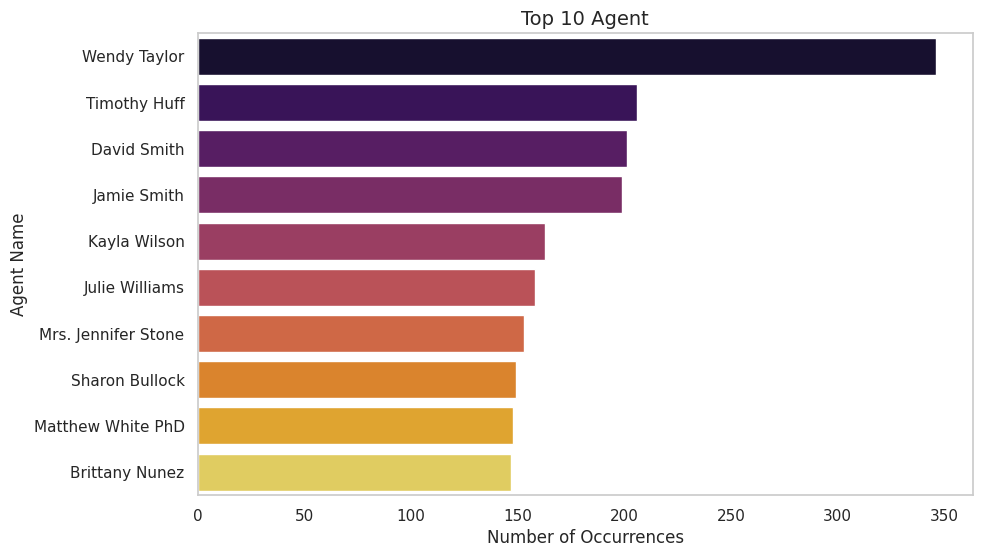

In [ ]:
# Chart - 8 visualization code
top_agent = fk_df['Agent_name'].value_counts().nlargest(10)
plt.figure(figsize = (10, 6))
sns.barplot(x = top_agent.values, y = top_agent.index, palette = 'inferno')
plt.title('Top 10 Agent', fontsize = 14)
plt.xlabel('Number of Occurrences', fontsize = 12)
plt.ylabel('Agent Name', fontsize = 12)
plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

I had picked bar-chart to identify the top Agent.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that Agent Wendy Taylor is the most occured Agent where as the Agent Timothy Huff is the second largest time occured Agent name.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart shows Agent Wendy Taylor as the most frequently occurring agent, with Agent Timothy Huff in second place. These insights suggest leveraging Wendy’s expertise could enhance team performance and client satisfaction. However, heavy reliance on Wendy might lead to burnout, and Timothy’s lower ranking could indicate performance issues. Addressing these concerns with balanced workloads and targeted training can prevent negative impacts and foster positive growth.

### Chart - 9

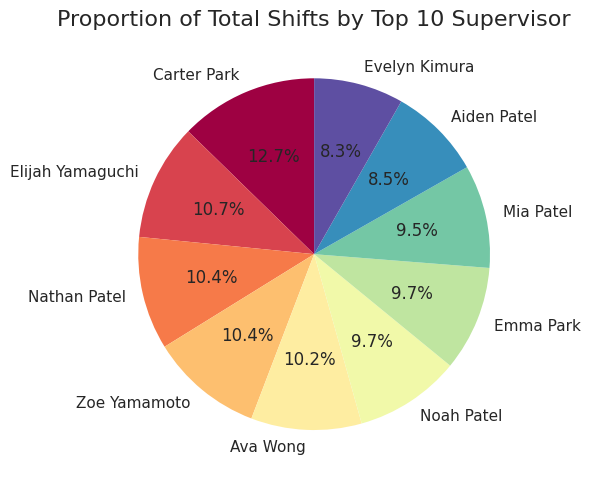

In [ ]:
# chart - 9 visualization code
total_counts = fk_df.groupby('Supervisor')['Agent Shift'].count().nlargest(10)

# Plotting the pie chart
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
total_counts.plot(kind='pie', autopct='%1.1f%%', colormap='Spectral', startangle=90,
                  wedgeprops={'edgecolor': 'none'})  # Remove white border

plt.title('Proportion of Total Shifts by Top 10 Supervisor', fontsize=16)
plt.ylabel('')  # Remove y-label
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


I had picked Pie-chart to identify the distribution of shifts by the top 10 Supervisor.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that Supervisor "Carter Park" has the highest occurrence time, accounting for 12.7%. This is followed by "Elijah Yamaguchi" at 10.7%, and both "Nathan Patel" and "Zoe Yamamoto" each at 10.4%.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights indicate that understanding supervisor time allocations can enhance operational efficiency and customer satisfaction. For example, leveraging "Carter Park's" high occurrence time can optimize task management and resource allocation.

#### Chart - 10

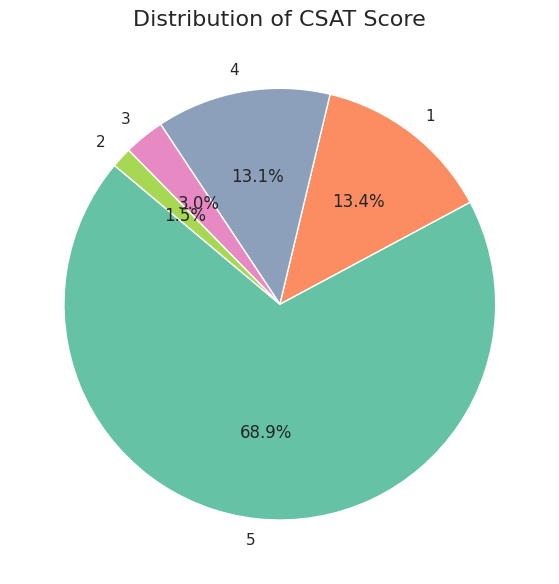

In [ ]:
# chart - 10 visualization code

# Calculating distribution of CSAT scores
csat_distribution = fk_df['CSAT Score'].value_counts()

colors = ['#66c2a5', '#fc8d62', '#8da0bb', '#e78ac3', '#a6d854']  # Modify as needed for more colors

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(csat_distribution, labels=csat_distribution.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Add title
plt.title('Distribution of CSAT Score', fontsize=16)

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


##### 1. Why did you pick the specific chart?

 i have choosen Pie-chart in order to analyse the CSAT Score distribution.

##### 2. What is/are the insight(s) found from the chart?

The pie chart demonstrates that 68.9% of responses indicate a CSAT Score of 5, signifying a high level of customer satisfaction. Conversely, CSAT Scores of 1 account for 13.4% of the responses, representing a minority of customers who report lower or very low satisfaction, while CSAT Scores of 4 make up 13.1%. This distribution emphasizes that most customers are highly satisfied, whereas a smaller segment experiences lower satisfaction levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positve Impact:** The insights gained from the CSAT Score distribution indicate that a significant majority of customers are highly satisfied, with 68.9% scoring a 5. This level of customer satisfaction can lead to positive business outcomes, such as increased customer loyalty, higher retention rates, and positive word-of-mouth referrals, ultimately driving sales and enhancing brand reputation.

**Negative Impact:** The presence of 13.4% of responses scoring a 1 indicates a segment of customers experiencing very low satisfaction. This negative feedback could signal underlying issues that, if unaddressed, may lead to decreased customer loyalty and potential churn.

#### Chart - 11

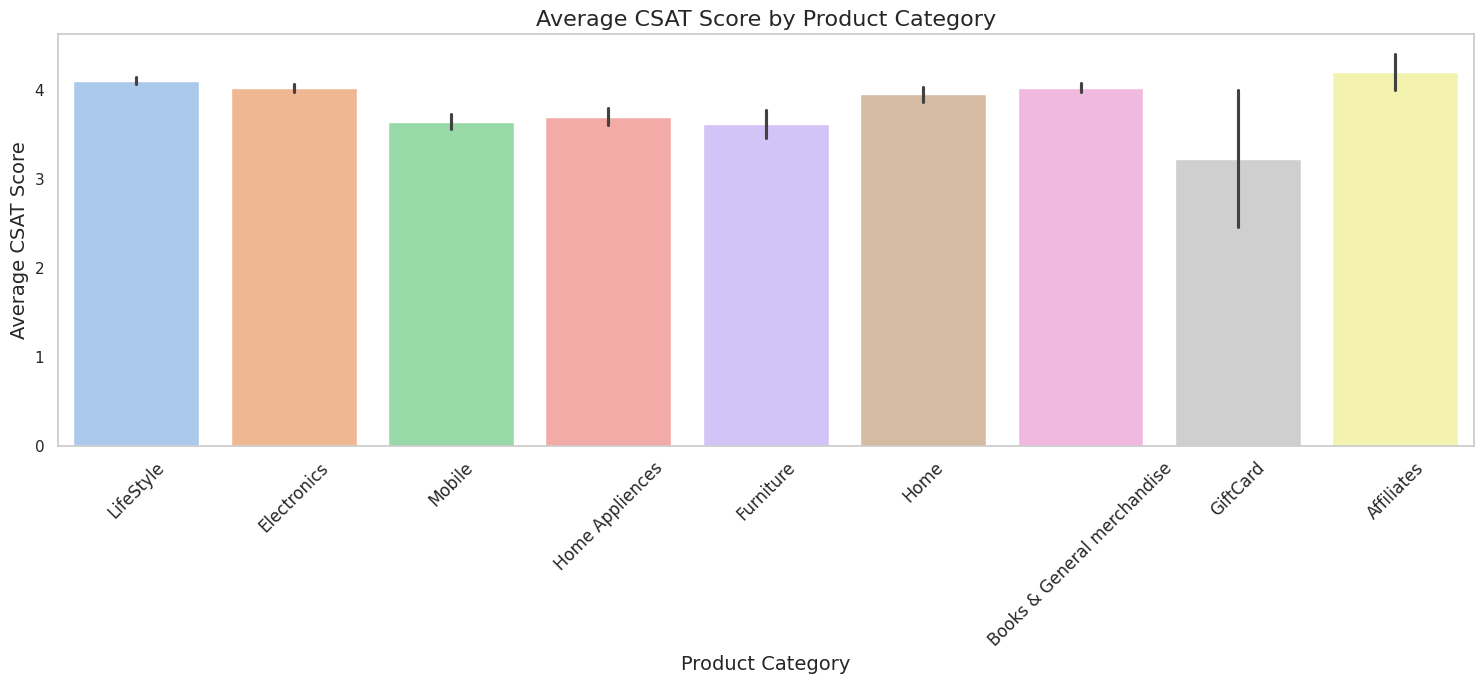

In [ ]:
# chart - 11 visualization code

# Filtering  out the "Not Available" product category
filtered_fk_df = fk_df[fk_df['Product_category'] != 'Not Available']

plt.figure(figsize=(15, 7))
sns.barplot(x='Product_category', y='CSAT Score', data=filtered_fk_df, palette='pastel')  # Change to a different color palette
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average CSAT Score', fontsize=14)
plt.title('Average CSAT Score by Product Category', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

I have choose bar-chart to identify the CSAT Score across the different Product categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the Electronics, Lifestyle, Affiliates and Home categories have average CSAT Scores above 4, indicating high customer satisfaction. In contrast, the Mobiles and Furniture categories have average CSAT Scores of 3.5, suggesting lower customer satisfaction in these areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights show high CSAT Scores above 4 for Electronics, Lifestyle, Affiliates and Home categories can boost customer loyalty and sales. However, the lower CSAT Scores of 3.5 for Mobiles and Furniture indicate areas needing improvement. Addressing these lower scores is essential to prevent negative feedback and potential loss of customers.

#### Chart - 12

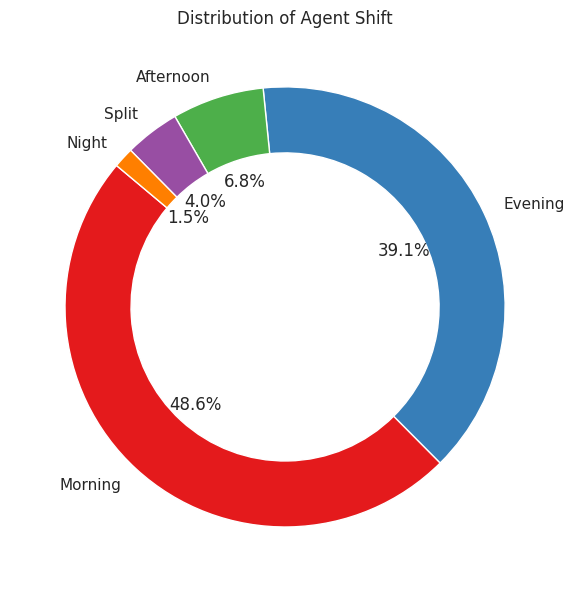

In [ ]:
# Chart - 12 visualization code

# Get the distribution of Agent Shift
agent_shift_distribution = fk_df['Agent Shift'].value_counts()

# Plot the donut chart
plt.figure(figsize=(6, 8))
plt.pie(agent_shift_distribution,
        labels=agent_shift_distribution.index,
        autopct='%1.1f%%',
        colors=plt.cm.Set1.colors,
        startangle=140,
        wedgeprops={'width': 0.3})

# Title
plt.title('Distribution of Agent Shift')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I have picked Donut chart to show the distribution of Agent Shift.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the morning shift comprises 48.6% of the total, while the evening shift represents 39.1%. The afternoon shift makes up a smaller portion, accounting for just 6.8%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights show that the morning shift (48.6%) and evening shift (39.1%) are well-utilized, which can enhance operational efficiency and customer satisfaction. However, the afternoon shift (6.8%) is underutilized, potentially leading to gaps in coverage or productivity. Addressing this imbalance is crucial to avoid negative impacts and ensure comprehensive service.

#### Chart - 13

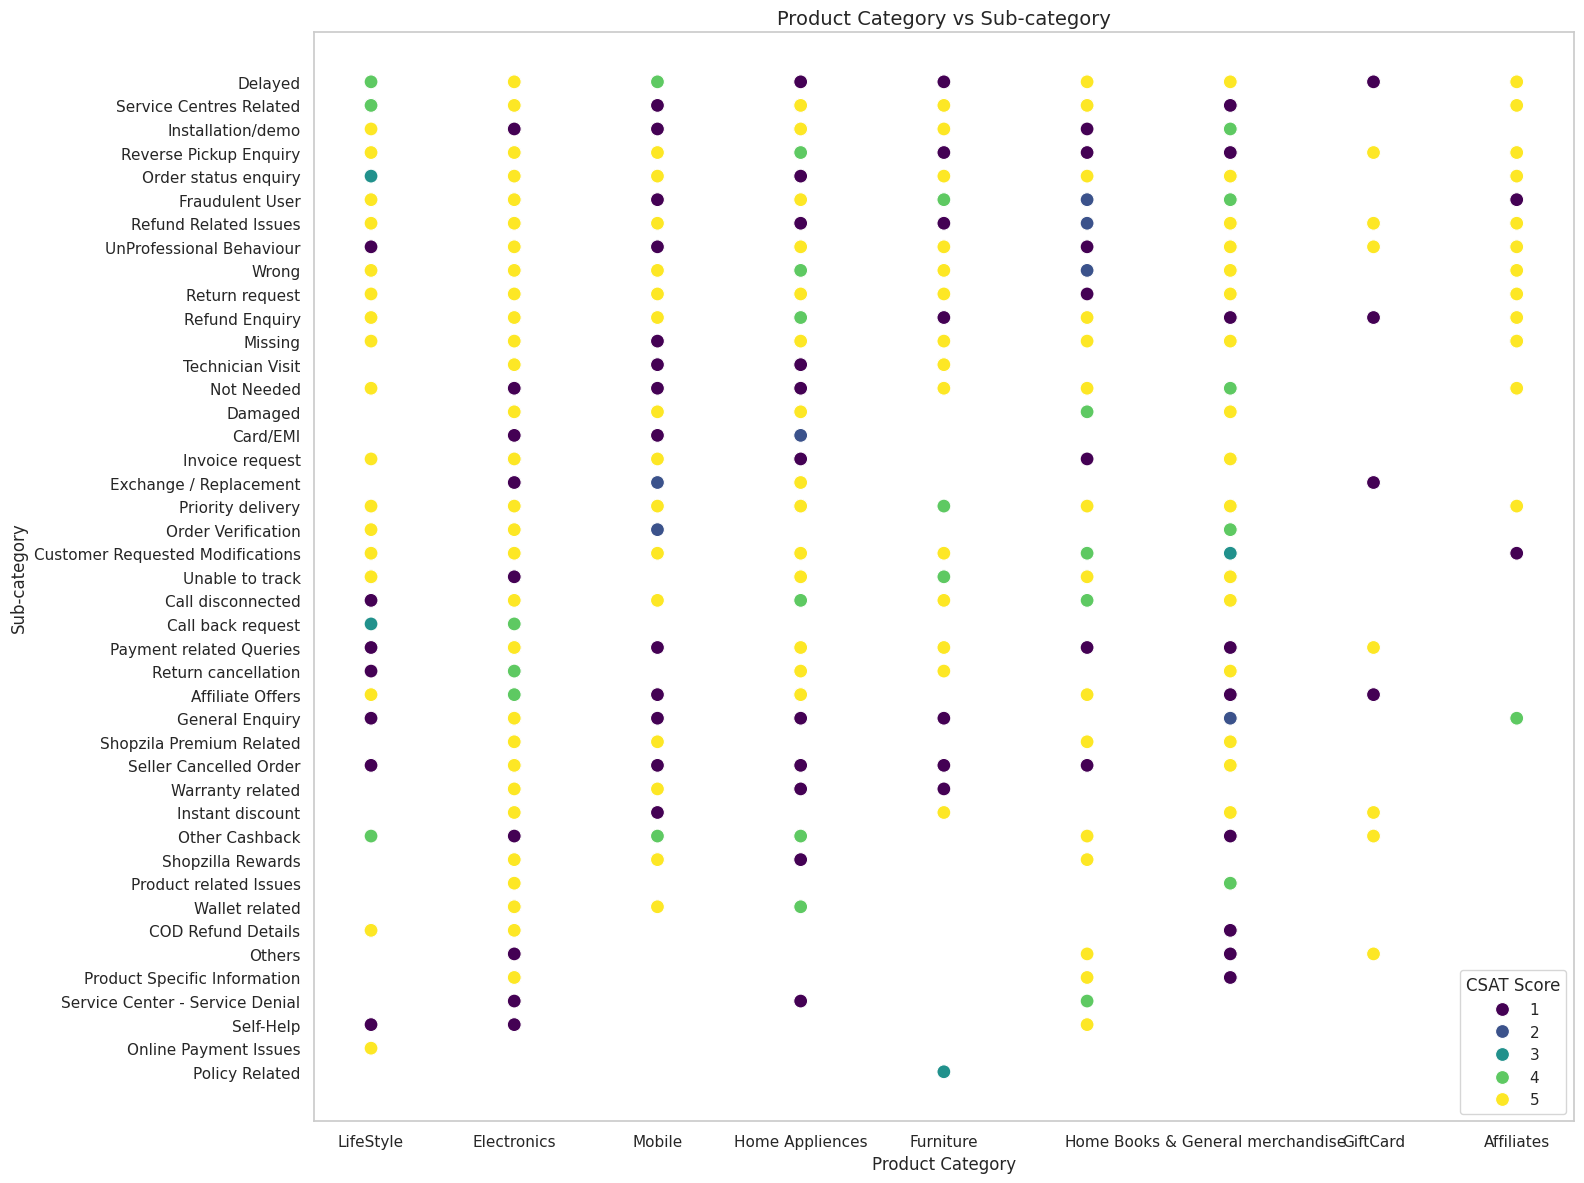

In [ ]:
# chart - 13 visualization code

# Filtering out "Not Available" entries from both Product_category and Sub-category
filtered_fk_df = fk_df[(fk_df['Product_category'] != 'Not Available') &
                        (fk_df['Sub-category'] != 'Not Available')]

# Ploting chart
plt.figure(figsize=(16, 12))
sns.scatterplot(data=filtered_fk_df, x='Product_category', y='Sub-category', hue='CSAT Score', palette='viridis', s=100)

plt.title('Product Category vs Sub-category',  fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Sub-category')
plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between product categories and subcategories.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates a lack of strong relationships between each product category and its corresponding subcategory.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.



#### Chart - 14

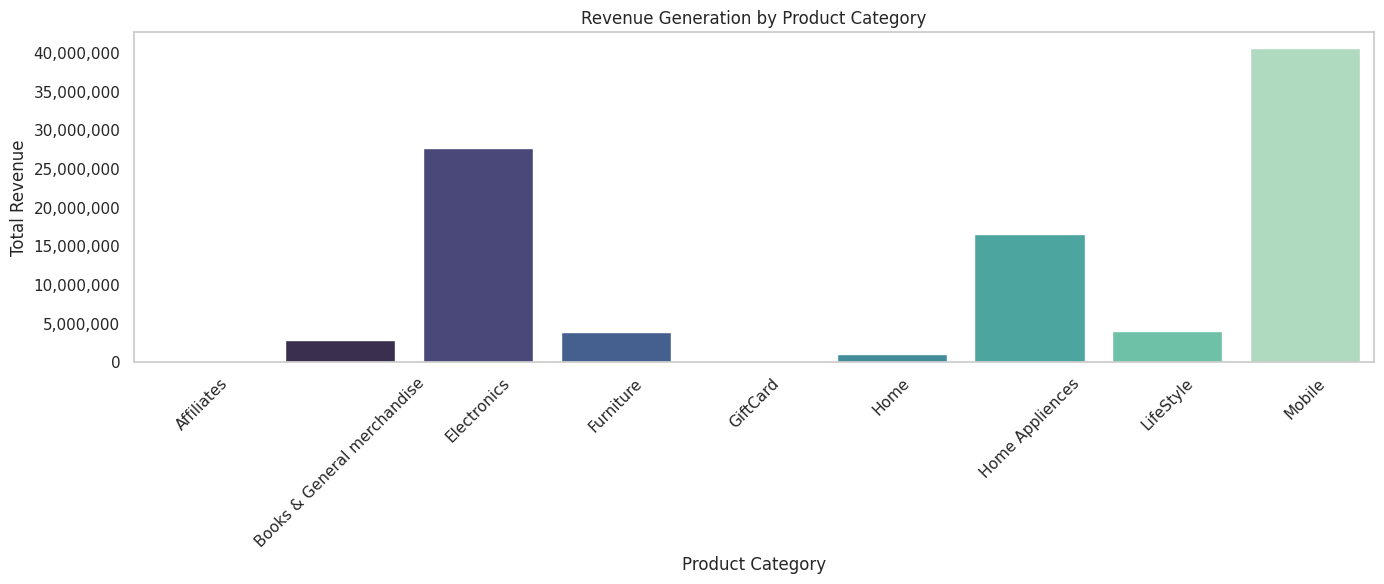

In [ ]:
# chart - 14 visualization code

# Filtering out "Not Available" entries from 'Product_category'
filtered_fk_df = fk_df[fk_df['Product_category'] != 'Not Available']

# Group the data by 'Product_category' and calculate the sum of 'Item_price'
revenue_generation = filtered_fk_df.groupby('Product_category')['Item_price'].sum()

# Plot the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=revenue_generation.index, y=revenue_generation.values, palette='mako')  # Added a color palette

# Set the correct labels and title
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Revenue Generation by Product Category', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Format y-axis to display as integers (without decimal places)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I have choose a Bar-chart to identify the revenue generated by each product category.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the Mobile category generates the highest revenue, exceeding 4 crore, followed by Electronics with 2.75 crore, Home Appliances with 1.7 crore, and Lifestyle with 45 lakhs. Conversely, categories such as Books & General merchandise, Home, and Furniture generate the least revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights show that the Mobile category drives the highest revenue, suggesting a focus on this area can boost overall growth. Electronics and Home Appliances also perform well, which can guide resource allocation and marketing strategies. However, low revenue from categories like Lifestyle, Home, and Furniture indicates potential issues. Addressing these underperforming categories is essential to prevent negative growth and enhance overall profitability.

#### Chart - 15

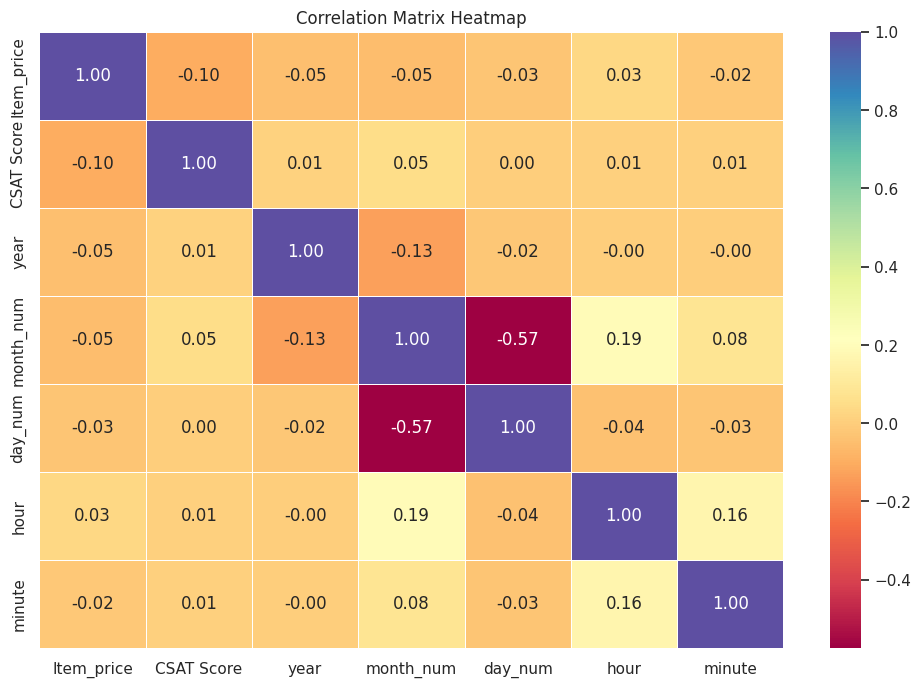

In [ ]:
# Chart - 15 visualization code
numeric_data = fk_df.select_dtypes(include=['number'])

# Computing correlation matrix for the numerical data
correlation_matrix = numeric_data.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Spectral', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

The purpose to pick corelation-heat map is to visualize the relation between each numeric variables.

##### 2. What is/are the insight(s) found from the chart?

The chart does not show any strong relationships between the variables.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

From the distribution of CSAT scores, I found that the mean CSAT score is 4.22.
Let's use hypothesis testing to see if this statement is true.

Null Hypothesis (H₀): μ = 4.22

Alternate Hypothesis (H₁): μ ≠ 4.22

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_1samp

# Test data for CSAT Score
test_data2 = fk_df['CSAT Score']

# Hypothesized mean is 4.24
hypothesized_mean = 4.22

# Conduct one-sample t-test
stats, p = ttest_1samp(test_data2, hypothesized_mean)

print('t-statistic = %.2f, p-value = %.3f' % (stats, p))

alpha = 0.05
if p < alpha:
    print("Reject null hypothesis: The mean CSAT score is significantly different from 4.22.")
else:
    print("Fail to reject the null hypothesis: The mean CSAT score is not significantly different from 4.22.")


t-statistic = 1.02, p-value = 0.309
Fail to reject the null hypothesis: The mean CSAT score is not significantly different from 4.22.


##### Which statistical test have you done to obtain P-Value?

I have conducted One sample t-test to obtain p-value

##### Why did you choose the specific statistical test?

I chosen one-sample t-test because I wanted to determine if the mean CSAT score in my dataset is significantly different from 4.22. This test is ideal for comparing the sample mean to a specific value, and it’s suitable for my data to check if it deviates from the hypothesized population mean.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Item_price mean is 1439.22 in the data set, Let us conduct a Hypothesis testing to know the mean value of Item_price is significantly different or not.

Null Hypothesis (H₀): μ = 1439.22

Alternate Hypothesis (H₁): μ ≠ 1439.22

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_1samp

# Define the hypothesized mean
hypothesized_mean = 1439.22

# Perform one-sample t-test
test_data1 = fk_df['Item_price']
t_stat, p_value = ttest_1samp(test_data1, hypothesized_mean)

# Print the t-statistic and p-value
print('t-statistic = %.2f, p-value = %.3f' % (t_stat, p_value))

# Define significance level (commonly 0.05)
alpha = 0.05

# Make a decision based on p-value
if p_value <= alpha:
    print("Reject null hypothesis: The mean of Item_price is significantly different from 1439.22.")
else:
    print("Fail to reject null hypothesis: The mean of Item_price is not significantly different from 1439.22.")


t-statistic = 0.00, p-value = 1.000
Fail to reject null hypothesis: The mean of Item_price is not significantly different from 1439.22.


##### Which statistical test have you done to obtain P-Value?

I have conducted one sample t-test to obrain the p-value.

##### Why did you choose the specific statistical test?

I chose the one-sample t-test because I wanted to know if the mean Itme_price in my dataset is significantly different from 1439.22. This test is ideal for comparing the sample mean to a specific value, and it’s suitable for my data to check if it deviates from the hypothesized population mean.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(fk_df.isnull().sum())

Unique id               0
channel_name            0
category                0
Sub-category            0
Customer Remarks        0
Order_id                0
order_date_time         0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Customer_City           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
day                     0
year                    0
month_num               0
day_num                 0
hour                    0
minute                  0
month                   0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

The dataset currently contains no null values. However, if null values were to be introduced, we could use suitable imputation methods to fill them in. The choice of imputation technique would depend on the nature and distribution of the data, ensuring that we maintain the dataset's integrity and accuracy.

### 2. Handling Outliers

##### From EDA we know that the Item Price has 5.02 % Outliers.

In [ ]:
# Calculate Q1 and Q3 while excluding zeros
Q1 = fk_df[fk_df['Item_price'] != 0]['Item_price'].quantile(0.25)
Q3 = fk_df[fk_df['Item_price'] != 0]['Item_price'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers, excluding zeros
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers without creating a new DataFrame
outliers = fk_df[(fk_df['Item_price'] < lower_bound) | (fk_df['Item_price'] > upper_bound) & (fk_df['Item_price'] != 0)]

# Output the count of outliers
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 3394


In [ ]:
# Calculate percentage of outliers
outlier_percentage = (len(outliers) / len(fk_df)) * 100
print(f"Percentage of outliers in Item_price: {outlier_percentage:.2f}%")

Percentage of outliers in Item_price: 5.02%


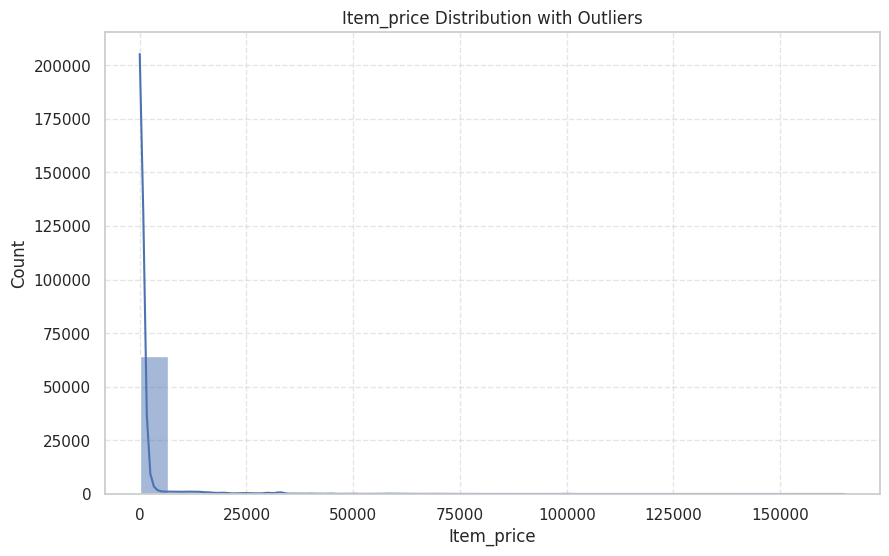

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot CSAT Score distribution before clipping
plt.figure(figsize=(10, 6))
sns.histplot(data=fk_df, x='Item_price', bins=25, kde=True)
plt.title('Item_price Distribution with Outliers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
fk_df['Item_price'] = fk_df['Item_price'].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
new_outliers = fk_df[(fk_df['Item_price'] < lower_bound) | (fk_df['Item_price'] > upper_bound)]
new_outlier_percentage = (len(new_outliers) / len(fk_df)) * 100
print(f"Percentage of outliers in Item_price after clipping: {new_outlier_percentage:.2f}%")

Percentage of outliers in Item_price after clipping: 0.00%


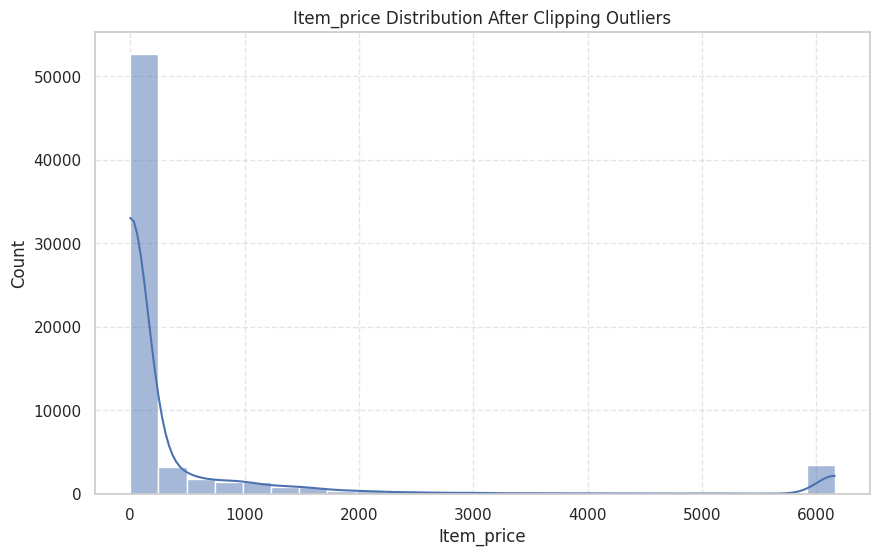

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fk_df, x='Item_price', bins=25, kde=True)
plt.title('Item_price Distribution After Clipping Outliers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since 5.02% of the Item_price values are identified as outliers, I opted for the IQR method to detect these extreme values. The IQR technique is a robust approach that focuses on the spread of the middle 50% of the data, making it less influenced by extreme values compared to methods like standard deviation.

To calculate the IQR, I determined the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Any values falling outside the calculated bounds were flagged as outliers, which helped me identify potential anomalies in the Item_price data.

I established the upper and lower bounds, and to address these outliers, I employed clipping. This technique allowed me to adjust the outlier values so they remain within a specified range without completely removing them from the dataset.


### 9. Handling Imbalanced Dataset

In [ ]:
# Filter to keep only valid CSAT Scores between 1 and 5
fk_df = fk_df[fk_df['CSAT Score'].between(1, 5)]

# Ensuring that our target variable remains int.
fk_df['CSAT Score'] = fk_df['CSAT Score'].astype(int)

In [ ]:
fk_df.drop(columns=['Unique id'], inplace=True)

In [ ]:
X = fk_df.drop(columns=['CSAT Score'])
y = fk_df['CSAT Score']

In [ ]:
y.value_counts().reset_index()

,CSAT Score,count
0,5,46655
1,1,9090
2,4,8836
3,3,2060
4,2,1034


##### Do you think the dataset is imbalanced? Explain Why.

The dataset is considered imbalanced because there is a substantial difference in the number of samples across the various classes. Specifically, the majority class (Class 5) has significantly more samples than the minority class (Class 4), which also has a considerably higher number of samples than Class 3. This pattern continues, with Class 3 having more samples than Class 2, and so on.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
oversample = RandomOverSampler(random_state=42)

# Apply oversampling to training data
X, y  = oversample.fit_resample(X, y)

In [ ]:
X.shape, y.shape

((233275, 24), (233275,))

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To address the imbalance in the dataset, I utilized RandomOverSampler. This approach balances the dataset by randomly replicating samples from the minority classes until all classes are represented equally.

### 8. Data Splitting

The optimal strategy for data preprocessing begins with splitting the dataset into training and test sets. Once the split is complete, encoding and scaling should be applied separately to the training and test sets. This approach ensures that the preprocessing steps do not unintentionally include information from the test set during the training process.

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import label_binarize
# Binarize y_test for ROC curve calculation (for multi-class problems)
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5])  # Ensure all classes 1-5 are included

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (186620, 24) (186620,)
Testing set shape: (46655, 24) (46655,)


##### What data splitting ratio have you used and why?

I opted for an 80-20 train-test split because it provides a good balance between having enough data for effective model training (80%) and ensuring a sufficient portion for reliable model evaluation (20%). This ratio is widely used and facilitates the assessment of the model's performance on unseen data.

### 3. Categorical Encoding

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Identify categorical features with high cardinality (more than 30 unique values)
cat_features_high_car = [column for column in fk_df.columns if fk_df[column].dtype == 'object' and len(fk_df[column].unique()) > 30]

# Identify categorical features with low cardinality (30 or fewer unique values)
cat_features = [column for column in fk_df.columns if fk_df[column].dtype == 'object' and len(fk_df[column].unique()) <= 30]

# Import BinaryEncoder for high-cardinality features and necessary transformers from sklearn
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Initialize BinaryEncoder for high-cardinality categorical features
encoder = BinaryEncoder(cols=cat_features_high_car)

# Apply Binary Encoding to the training and test data
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Initialize OneHotEncoder for low-cardinality categorical features
onehotencoder = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int64)

# Create a ColumnTransformer to apply OneHotEncoder to low-cardinality features
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", onehotencoder, cat_features),  # Apply OneHotEncoder to low-cardinality features
    ], remainder='passthrough'  # Pass through other columns without transformation
)

# Apply One-Hot Encoding to low-cardinality features and pass through high-cardinality features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert the transformed arrays back to DataFrames with feature names
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

In [ ]:
X_train.head()

,OneHotEncoder__channel_name_Inbound,OneHotEncoder__channel_name_Outcall,OneHotEncoder__category_Cancellation,OneHotEncoder__category_Feedback,OneHotEncoder__category_Offers & Cashback,OneHotEncoder__category_Onboarding related,OneHotEncoder__category_Order Related,OneHotEncoder__category_Others,OneHotEncoder__category_Payments related,OneHotEncoder__category_Product Queries,...,remainder__Supervisor_1,remainder__Supervisor_2,remainder__Supervisor_3,remainder__Supervisor_4,remainder__Supervisor_5,remainder__year,remainder__month_num,remainder__day_num,remainder__hour,remainder__minute
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2023,8,6,8,28
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,2023,8,12,15,28
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2023,7,21,3,16
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,2023,8,11,20,21
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2023,8,9,12,59


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used both One-Hot Encoding and Binary Encoding for categorical columns in my dataset.

1. One-Hot Encoding: Applied to categorical columns without an inherent order or ranking, such as channel_name, category, Sub-category,Customer Remarks, Customer_City etc.

2. Binary Encoding: Used for categorical columns with high cardinality, such as Item_price, Agent_name, Supervisor, Manager, Agent Shift. Binary Encoding was chosen to manage the large number of features that One-Hot Encoding would have introduced

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

I have droped Unique id column because it lacks significant predictive power.

##### Which all features you found important and why?

Answere Here.

1. Channel Name: Different channels may influence customer engagement levels and their likelihood of making a purchase.

2. Product Category: Various product categories can attract different customer segments with distinct preferences and interests.

3. Customer Remarks: Feedback from customers can provide insights into their satisfaction and concerns, influencing their future purchasing decisions.

4. Order ID: While not predictive by itself, it helps in tracking customer transactions and behaviors.

5. Order Date Time: The timing of orders may reveal trends related to peak purchasing times or seasonal interests.

6. Issue Reported At: The timestamp of reported issues can indicate common pain points and the urgency of customer needs.

7. ssue Responded: The response time for issues may affect customer satisfaction and loyalty.

8. urvey Response Date: This feature is crucial for understanding the timing of customer feedback and its relation to their experience.

9. Customer City: The location of customers can influence their purchasing habits and preferences based on regional factors.

10. Item Price: The price of items plays a significant role in customer interest and purchasing decisions.

11. Agent Name: Different agents may have varying success rates in closing sales, impacting overall performance.

12. Supervisor and Manager: These roles might reflect the support structure behind sales, which could influence customer interactions.

13. Tenure Bucket: This indicates how long customers have been with the company, which can correlate with their loyalty and purchasing behavior.

14. Agent Shift: The timing of agent shifts might affect customer availability and engagement.

### 6. Data Scaling

In [ ]:
# Scaling your data
num_columns = [column for column in X_train.columns if X_train[column].dtype != "object" and len(X_train[column].unique()) > 10]

# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the numerical columns
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

# Transform the numerical columns of the test data using the fitted scaler
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
# Save the original feature column names
features_columns = X_train.columns

# Convert the DataFrame to a NumPy array
# X_train = X_train.values

# Convert the test set DataFrame to a NumPy array
# X_test = X_test.values

##### Which method have you used to scale you data and why?

I used Standard Scaling (via StandardScaler) because it normalizes features to have a mean of 0 and a standard deviation of 1. This ensures equal contribution from all features, improves convergence for algorithms, and handles features with different units effectively.

## ***7. ML Model Implementation***

In [ ]:
# << ML Model Building >>
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

### Model : 1 (Decision Tree)

In [ ]:
# ML Model - 1 Implementation
model_1 = DecisionTreeClassifier()

# Fit the Algorithm
model_1.fit(X_train, y_train)
# Predict on the model
model_1_pred = model_1.predict(X_test)

In [ ]:
print(classification_report(y_test, model_1_pred))

              precision    recall  f1-score   support

           1       0.84      0.99      0.91      9247
           2       0.83      1.00      0.91      9360
           3       0.83      1.00      0.90      9402
           4       0.83      0.99      0.91      9356
           5       0.98      0.21      0.34      9290

    accuracy                           0.84     46655
   macro avg       0.86      0.84      0.79     46655
weighted avg       0.86      0.84      0.79     46655



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Create a dictionary for evaluation metrics for model_2
evaluation_dict_model_1 = {
    'Model Name': 'model_1',
    'Model Type': 'Decision Tree Classifier',
    'Accuracy': accuracy_score(y_test, model_1_pred),
    'Recall': recall_score(y_test, model_1_pred, average='weighted'),
    'Precision': precision_score(y_test, model_1_pred, average='weighted'),
    'F1-Score': f1_score(y_test, model_1_pred, average='weighted')
}

# Convert the dictionary into a DataFrame for easy visualization
evaluation_df_model_1 = pd.DataFrame(evaluation_dict_model_1, index=[0])

# Output the DataFrame
evaluation_df_model_1


,Model Name,Model Type,Accuracy,Recall,Precision,F1-Score
0,model_1,Decision Tree Classifier,0.838774,0.838774,0.862162,0.794337


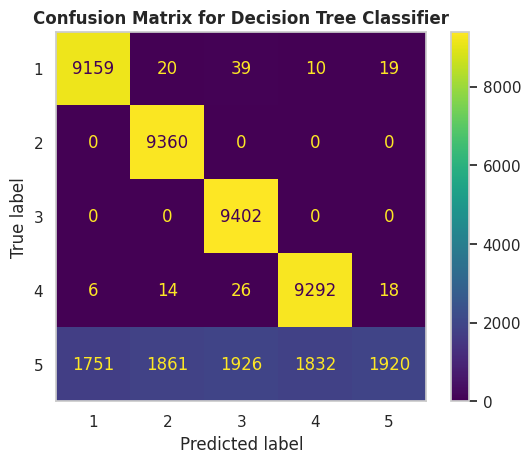

In [ ]:
# Plot the confusion matrix for the Decision Tree model
ConfusionMatrixDisplay.from_estimator(model_1, X_test, y_test)

# Add a title
plt.title('Confusion Matrix for Decision Tree Classifier', fontweight='bold')
plt.grid(False)
# Display the plot
plt.show()

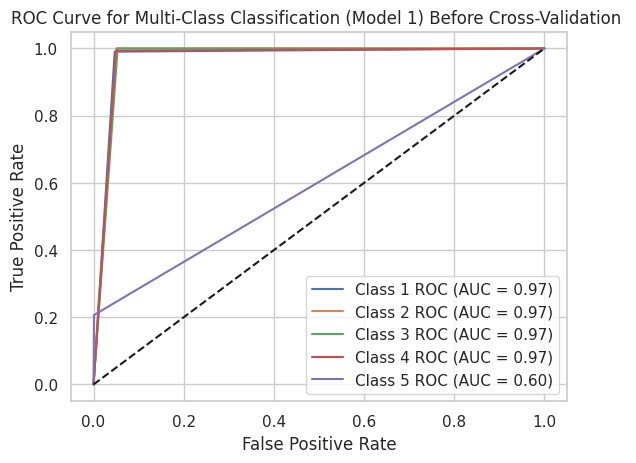

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels for multi-class ROC curve calculation
n_classes = len(np.unique(y_test))  # Adjust according to your dataset
y_test_binarized = label_binarize(y_test, classes=np.arange(1, n_classes + 1))

# Predict probabilities for the ROC curve using model_2
y_score = model_1.predict_proba(X_test)

# Initialize a ROC curve plot
plt.figure()

# For each class, compute the ROC curve
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i + 1} ROC (AUC = {roc_auc:.2f})')

# Plot diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Model 1) Before Cross-Validation ')
plt.legend(loc="lower right")

# Display the ROC curve plot
plt.show()

#### 2. Cross- Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree model
model_1 = DecisionTreeClassifier()

# Perform cross-validation (cv=3 for 3-fold cross-validation)
cv_scores = cross_val_score(model_1, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

# Output the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.78733905 0.79388172 0.93814102]
Mean CV Accuracy: 0.8397872594242628


##### Which cross-validation optimization technique have you used and why?

Answere Here.

I used K-Fold Cross-Validation to optimize the Decision Tree model. This technique was chosen because it ensures balanced evaluation by using each fold as a test set once while training on the remaining data. It provides a reliable estimate of model performance and stability, as shown by the mean accuracy of 0.84 and the variations in scores across folds. This method efficiently utilizes data and offers insights into the model’s generalizability.
Additionally, the variation in accuracy scores across the folds ([0.787, 0.797, 0.937]) offers insights into the model’s consistency and stability.

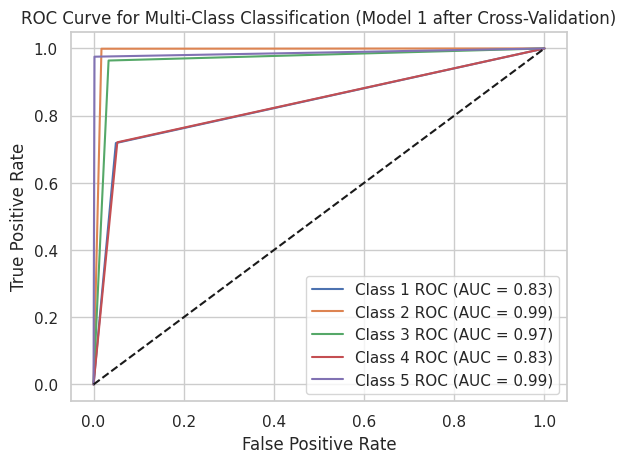

In [ ]:
from sklearn.model_selection import cross_val_predict

# Perform cross-validation and predict probabilities
y_score_cv = cross_val_predict(model_1, X_test, y_test, cv=3, method='predict_proba')

# Binarize the output labels for multi-class ROC curve calculation
n_classes = len(np.unique(y_test))  # Adjust according to your dataset
y_test_binarized = label_binarize(y_test, classes=np.arange(1, n_classes + 1))

# Initialize a ROC curve plot
plt.figure()

# For each class, compute the ROC curve after cross-validation
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_cv[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i + 1} ROC (AUC = {roc_auc:.2f})')

# Plot diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Model 1 after Cross-Validation)')
plt.legend(loc="lower right")

# Display the ROC curve plot
plt.show()


#### Enhancements Following Cross-Validation:
After performing 3-Fold Cross-Validation, the AUC values for the classes have shown notable changes. Specifically, the AUC for Class 1 decreased from 0.97 to 0.83, while Class 3's AUC remains constant at 0.97. Similarly, Class 4's AUC dropped from 0.97 to 0.83. Conversely, the AUC for Class 2 increased from 0.97 to 0.99, and Class 5 experienced a significant rise from 0.60 to 0.99. Overall the model has performed well for class 5.

### Model - 2 (Random Forest)

In [ ]:
# ML Model - 2 Implementation
model_2 = RandomForestClassifier()
# Fit the Algorithm
model_2.fit(X_train, y_train)
# Predict on the model
model_2_pred = model_2.predict(X_test)

In [ ]:
print(classification_report(y_test, model_2_pred))

              precision    recall  f1-score   support

           1       0.85      0.99      0.91      9247
           2       0.98      1.00      0.99      9360
           3       0.94      1.00      0.97      9402
           4       0.72      0.99      0.84      9356
           5       0.98      0.36      0.52      9290

    accuracy                           0.87     46655
   macro avg       0.89      0.87      0.85     46655
weighted avg       0.89      0.87      0.85     46655



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Create a dictionary for evaluation metrics
evaluation_dict = {
    'Model Name': 'model_2',
    'Model Type': 'Random Forest Classifier',
    'Accuracy': accuracy_score(y_test, model_2_pred),
    'Recall': recall_score(y_test, model_2_pred, average='weighted'),  # Use 'weighted' for multiclass
    'Precision': precision_score(y_test, model_2_pred, average='weighted'),  # Use 'weighted' for multiclass
    'F1-Score': f1_score(y_test, model_2_pred, average='weighted')  # Use 'weighted' for multiclass
}

# Convert the dictionary into a DataFrame
evaluation_df = pd.DataFrame(evaluation_dict, index=[0])

# Output the DataFrame
evaluation_df

,Model Name,Model Type,Accuracy,Recall,Precision,F1-Score
0,model_2,Random Forest Classifier,0.868546,0.868546,0.890854,0.845485


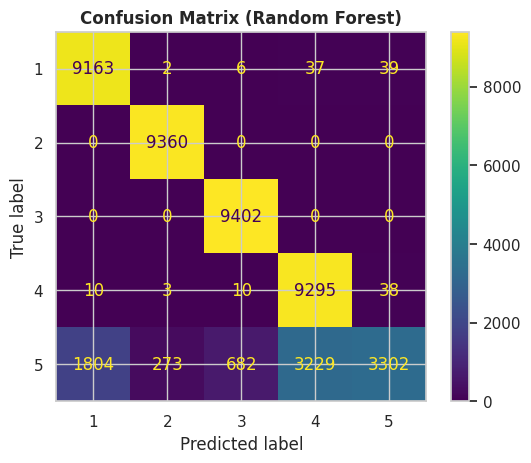

In [ ]:
# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model_2, X_test, y_test)
plt.title('Confusion Matrix (Random Forest)', fontweight='bold')
plt.show()

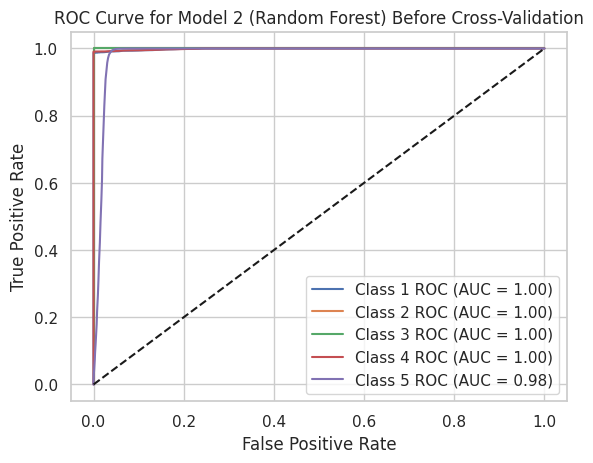

In [ ]:
# Binarize the output labels for multi-class ROC curve calculation
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.arange(1, n_classes + 1))

# Predict probabilities for the ROC curve
y_score = model_2.predict_proba(X_test)

# Initialize a ROC curve plot
plt.figure()

# For each class, compute the ROC curve
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i + 1} ROC (AUC = {roc_auc:.2f})')

# Plot diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 2 (Random Forest) Before Cross-Validation')
plt.legend(loc="lower right")

# Display the ROC curve plot
plt.show()

#### 2. Cross- Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (cv=3 for 3-fold cross-validation)
cv_scores = cross_val_score(model_2, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

# Output the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.79405855 0.83169097 0.97562936]
Mean CV Accuracy: 0.8671262914107228


##### Which cross-validation optimization technique have you used and why?

Answere Here.

I utilized K-Fold Cross-Validation for optimizing the Random Forest model. This technique was selected because it effectively balances model evaluation and computational efficiency.

The scores obtained from cross-validation ([0.7940, 0.8316, 0.9756]) reflect the model's performance across different subsets, indicating a robust evaluation. The mean CV accuracy of approximately 0.87 demonstrates the model’s overall effectiveness and its ability to generalize well to unseen data. K-Fold Cross-Validation provides a comprehensive assessment of model stability and performance, making it a reliable choice for this analysis.

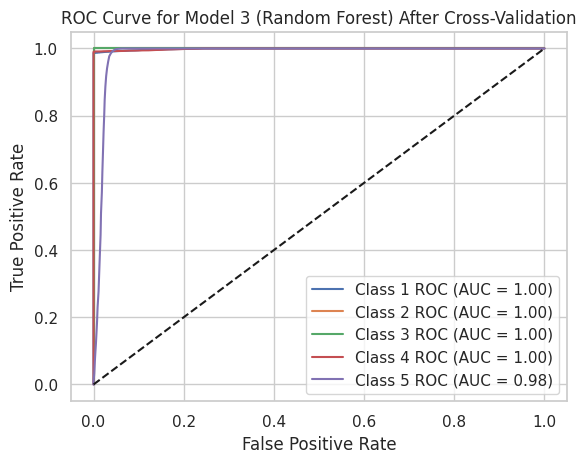

In [ ]:
# Fit the model again on the cross-validated dataset (if necessary)
model_2.fit(X_train, y_train)

# Predict probabilities for the ROC curve
y_score_cv = model_2.predict_proba(X_test)

# Initialize a ROC curve plot
plt.figure()

# For each class, compute the ROC curve
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_cv[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i + 1} ROC (AUC = {roc_auc:.2f})')

# Plot diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 3 (Random Forest) After Cross-Validation')
plt.legend(loc="lower right")

# Display the ROC curve plot
plt.show()

#### Enhancements Following Cross-Validation:

After conducting cross-validation, the AUC remained stable, indicating that the model's ability to distinguish between classes did not change. This consistency suggests that the model is reliable and robust, as it maintained its performance level across different subsets of the data. The unchanged AUC also implies that the cross-validation process effectively validated the model without introducing any significant variations in its predictive capability.

### Model - 3 (Extra Trees)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

# Initialize Extra Trees Classifier
model_3 = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model
model_3.fit(X_train, y_train)

# Make predictions
y_pred_et = model_3.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_et))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96      9247
           2       0.99      1.00      1.00      9360
           3       0.98      1.00      0.99      9402
           4       0.90      0.99      0.94      9356
           5       0.98      0.80      0.88      9290

    accuracy                           0.96     46655
   macro avg       0.96      0.96      0.95     46655
weighted avg       0.96      0.96      0.95     46655



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Create a dictionary for evaluation metrics
evaluation_dict_et = {
    'Model Name': 'Model_3',
    'Model Type': 'Extra Trees Classifier',
    'Accuracy': accuracy_score(y_test, y_pred_et),
    'Recall': recall_score(y_test, y_pred_et, average='weighted'),  # Use 'weighted' for multiclass
    'Precision': precision_score(y_test, y_pred_et, average='weighted'),  # Use 'weighted' for multiclass
    'F1-Score': f1_score(y_test, y_pred_et, average='weighted')  # Use 'weighted' for multiclass
}

# Convert the dictionary into a DataFrame
evaluation_df_et = pd.DataFrame(evaluation_dict_et, index=[0])

# Output the DataFrame
evaluation_df_et


,Model Name,Model Type,Accuracy,Recall,Precision,F1-Score
0,Model_3,Extra Trees Classifier,0.956039,0.956039,0.957962,0.954638


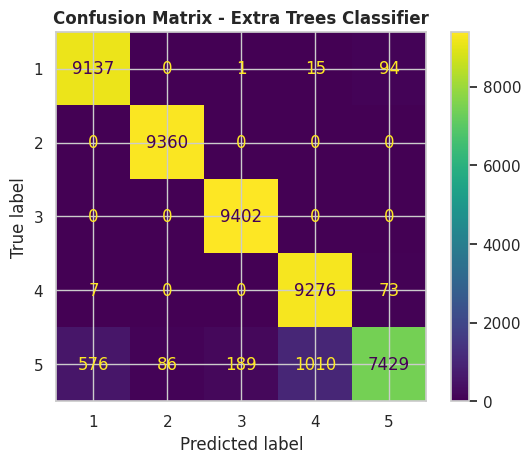

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualizing Confusion Matrix for Extra Trees Classifier
ConfusionMatrixDisplay.from_estimator(model_3, X_test, y_test)
plt.title('Confusion Matrix - Extra Trees Classifier', fontweight='bold')
plt.show()

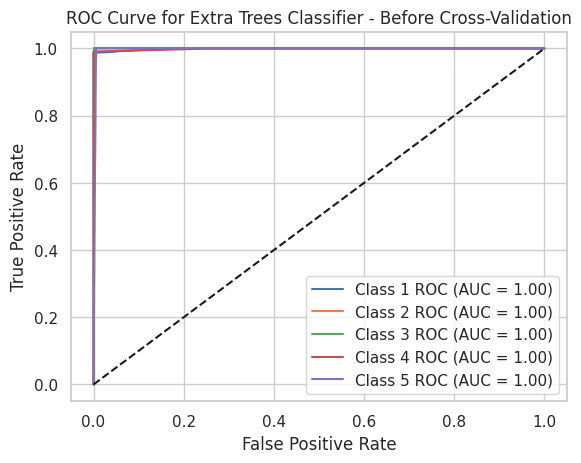

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output labels for multi-class ROC curve calculation
n_classes = len(np.unique(y_test))  # Adjust according to your dataset
y_test_binarized = label_binarize(y_test, classes=np.arange(1, n_classes + 1))

# Predict probabilities for the ROC curve
y_score_et = model_3.predict_proba(X_test)

# Initialize a ROC curve plot
plt.figure()

# For each class, compute the ROC curve
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_et[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i + 1} ROC (AUC = {roc_auc:.2f})')

# Plot diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Extra Trees Classifier - Before Cross-Validation')
plt.legend(loc="lower right")

# Display the ROC curve plot
plt.show()

#### 2. Cross- Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (cv=3 for 3-fold cross-validation)
cv_scores_et = cross_val_score(model_3, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

# Output the cross-validation scores
print("Cross-Validation Scores (Extra Trees):", cv_scores_et)
print("Mean CV Accuracy (Extra Trees):", cv_scores_et.mean())

Cross-Validation Scores (Extra Trees): [0.7965663  0.85601299 0.97591872]
Mean CV Accuracy (Extra Trees): 0.8761660044621005


##### Which cross-validation optimization technique have you used and why?

Answere Here.

I utilized K-Fold Cross-Validation for optimizing the Extra Trees model. By partitioning the dataset into three folds, each fold serves as a test set once, while the remaining two folds are employed for training. The cross-validation scores obtained from the Extra Trees model were [0.7965, 0.8560, 0.9759], reflecting its performance across various subsets. The mean CV accuracy of approximately 0.8761 indicates the model's effectiveness and its capability to generalize well to unseen data.

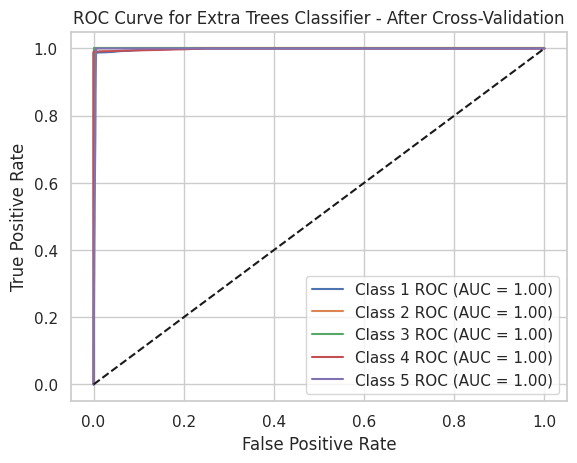

In [ ]:
# Refit the model if cross-validation gave you new hyperparameters (if tuning)
# Otherwise, continue using the previously fitted model

# Predict probabilities for the ROC curve after cross-validation
y_score_et_cv = model_3.predict_proba(X_test)

# Initialize a ROC curve plot
plt.figure()

# For each class, compute the ROC curve after cross-validation
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_et_cv[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i + 1} ROC (AUC = {roc_auc:.2f})')

# Plot diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Extra Trees Classifier - After Cross-Validation')
plt.legend(loc="lower right")

# Display the ROC curve plot
plt.show()

#### Enhancements Following Cross-Validation:
After conducting cross-validation, the AUC for the Extra Trees model remained unchanged, indicating that the model's ability to distinguish between classes was consistent. This stability suggests that the model is reliable and that the cross-validation process effectively validated its performance without introducing significant variations.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answere Here.

1. Precision: Ensures that the model accurately targets the right customers, minimizing the risk of false positives and reducing unnecessary marketing efforts.

2. Recall: Prioritizes identifying as many interested customers as possible, ensuring no potential customers are overlooked.

3. F1 Score: Provides a balanced measure by combining precision and recall, offering a clearer view of the model’s overall performance.

4. ROC-AUC: Evaluates the model’s ability to differentiate between interested and non-interested customers across various thresholds, giving insight into its classification effectiveness.

5. Confusion Matrix: Highlights specific prediction errors, helping to pinpoint areas for improvement in the model's decision-making process.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

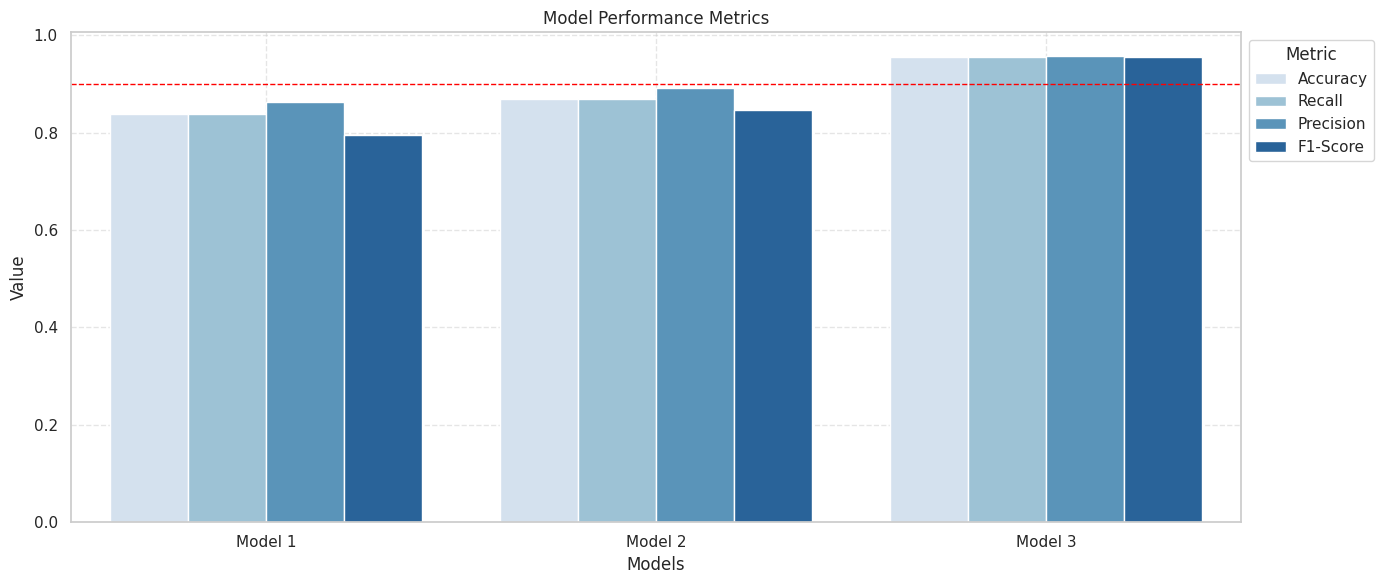

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluation metrics for each model
evaluation_dicts = []

# Model 1 metrics
evaluation_dicts.append({
    'Model Name': 'Model 1',
    'Accuracy': accuracy_score(y_test, model_1_pred),  # Replace with your variable y_test, y_pred_model_1
    'Recall': recall_score(y_test, model_1_pred, average='weighted'),
    'Precision': precision_score(y_test, model_1_pred, average='weighted'),
    'F1-Score': f1_score(y_test, model_1_pred, average='weighted')
})

# Model 2 metrics
evaluation_dicts.append({
    'Model Name': 'Model 2',
    'Accuracy': accuracy_score(y_test, model_2_pred),  # Replace with your variable y_test, y_pred_model_2
    'Recall': recall_score(y_test, model_2_pred, average='weighted'),
    'Precision': precision_score(y_test, model_2_pred, average='weighted'),
    'F1-Score': f1_score(y_test, model_2_pred, average='weighted')
})

# Model 3 (Extra Trees) metrics
evaluation_dicts.append({
    'Model Name': 'Model 3',
    'Accuracy': accuracy_score(y_test, y_pred_et),  # Replace with your variable y_test, y_pred_model_3
    'Recall': recall_score(y_test, y_pred_et, average='weighted'),
    'Precision': precision_score(y_test, y_pred_et, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_et, average='weighted')
})

# Create DataFrame
evaluation_df = pd.DataFrame(evaluation_dicts)

# Melt the DataFrame for plotting
df_melted = evaluation_df.melt(id_vars=['Model Name'], var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x='Model Name', y='Value', hue='Metric', data=df_melted, palette='Blues')

# Add a horizontal line at 0.90
plt.axhline(y=0.90, color='red', linestyle='--', linewidth=1)

# Titles and labels
plt.title('Model Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### Selected Model: Model - 3 (Extra Trees)


Why:

I have chosen the Extra Trees model as my final selection for predicting the CSAT score due to its superior accuracy, recall, precision, and F1-score compared to all other models evaluated.

Accuracy: The Extra Trees model achieved an impressive accuracy of 0.956039, making it the highest-performing model among those evaluated.
Recall: It exhibits a strong recall of 0.956039, ensuring that it captures a significant portion of relevant instances.
Precision: With a precision score of 0.957962, the model effectively targets the most pertinent cases.
F1-Score: The Extra Trees model also boasts an F1-Score of 0.954638, indicating a solid balance between precision and recall.

Overall, the Extra Trees model provides an exceptional combination of high accuracy, recall, precision, and F1-Score, making it the most effective model for predicting CSAT scores.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
feature_df = pd.DataFrame({'feature_name ': X_train.columns, 'feature_importance': model_3.feature_importances_})

In [ ]:
feature_df.sort_values(by='feature_importance', ascending=False, inplace=True)
feature_df

,feature_name,feature_importance
72,remainder__Order_id_0,0.074004
73,remainder__Order_id_1,0.041678
74,remainder__Order_id_2,0.022982
89,remainder__Issue_reported at,0.014697
125,remainder__minute,0.014582
...,...,...
51,OneHotEncoder__month_September,0.000067
42,OneHotEncoder__month_December,0.000054
43,OneHotEncoder__month_February,0.000038
49,OneHotEncoder__month_November,0.000034


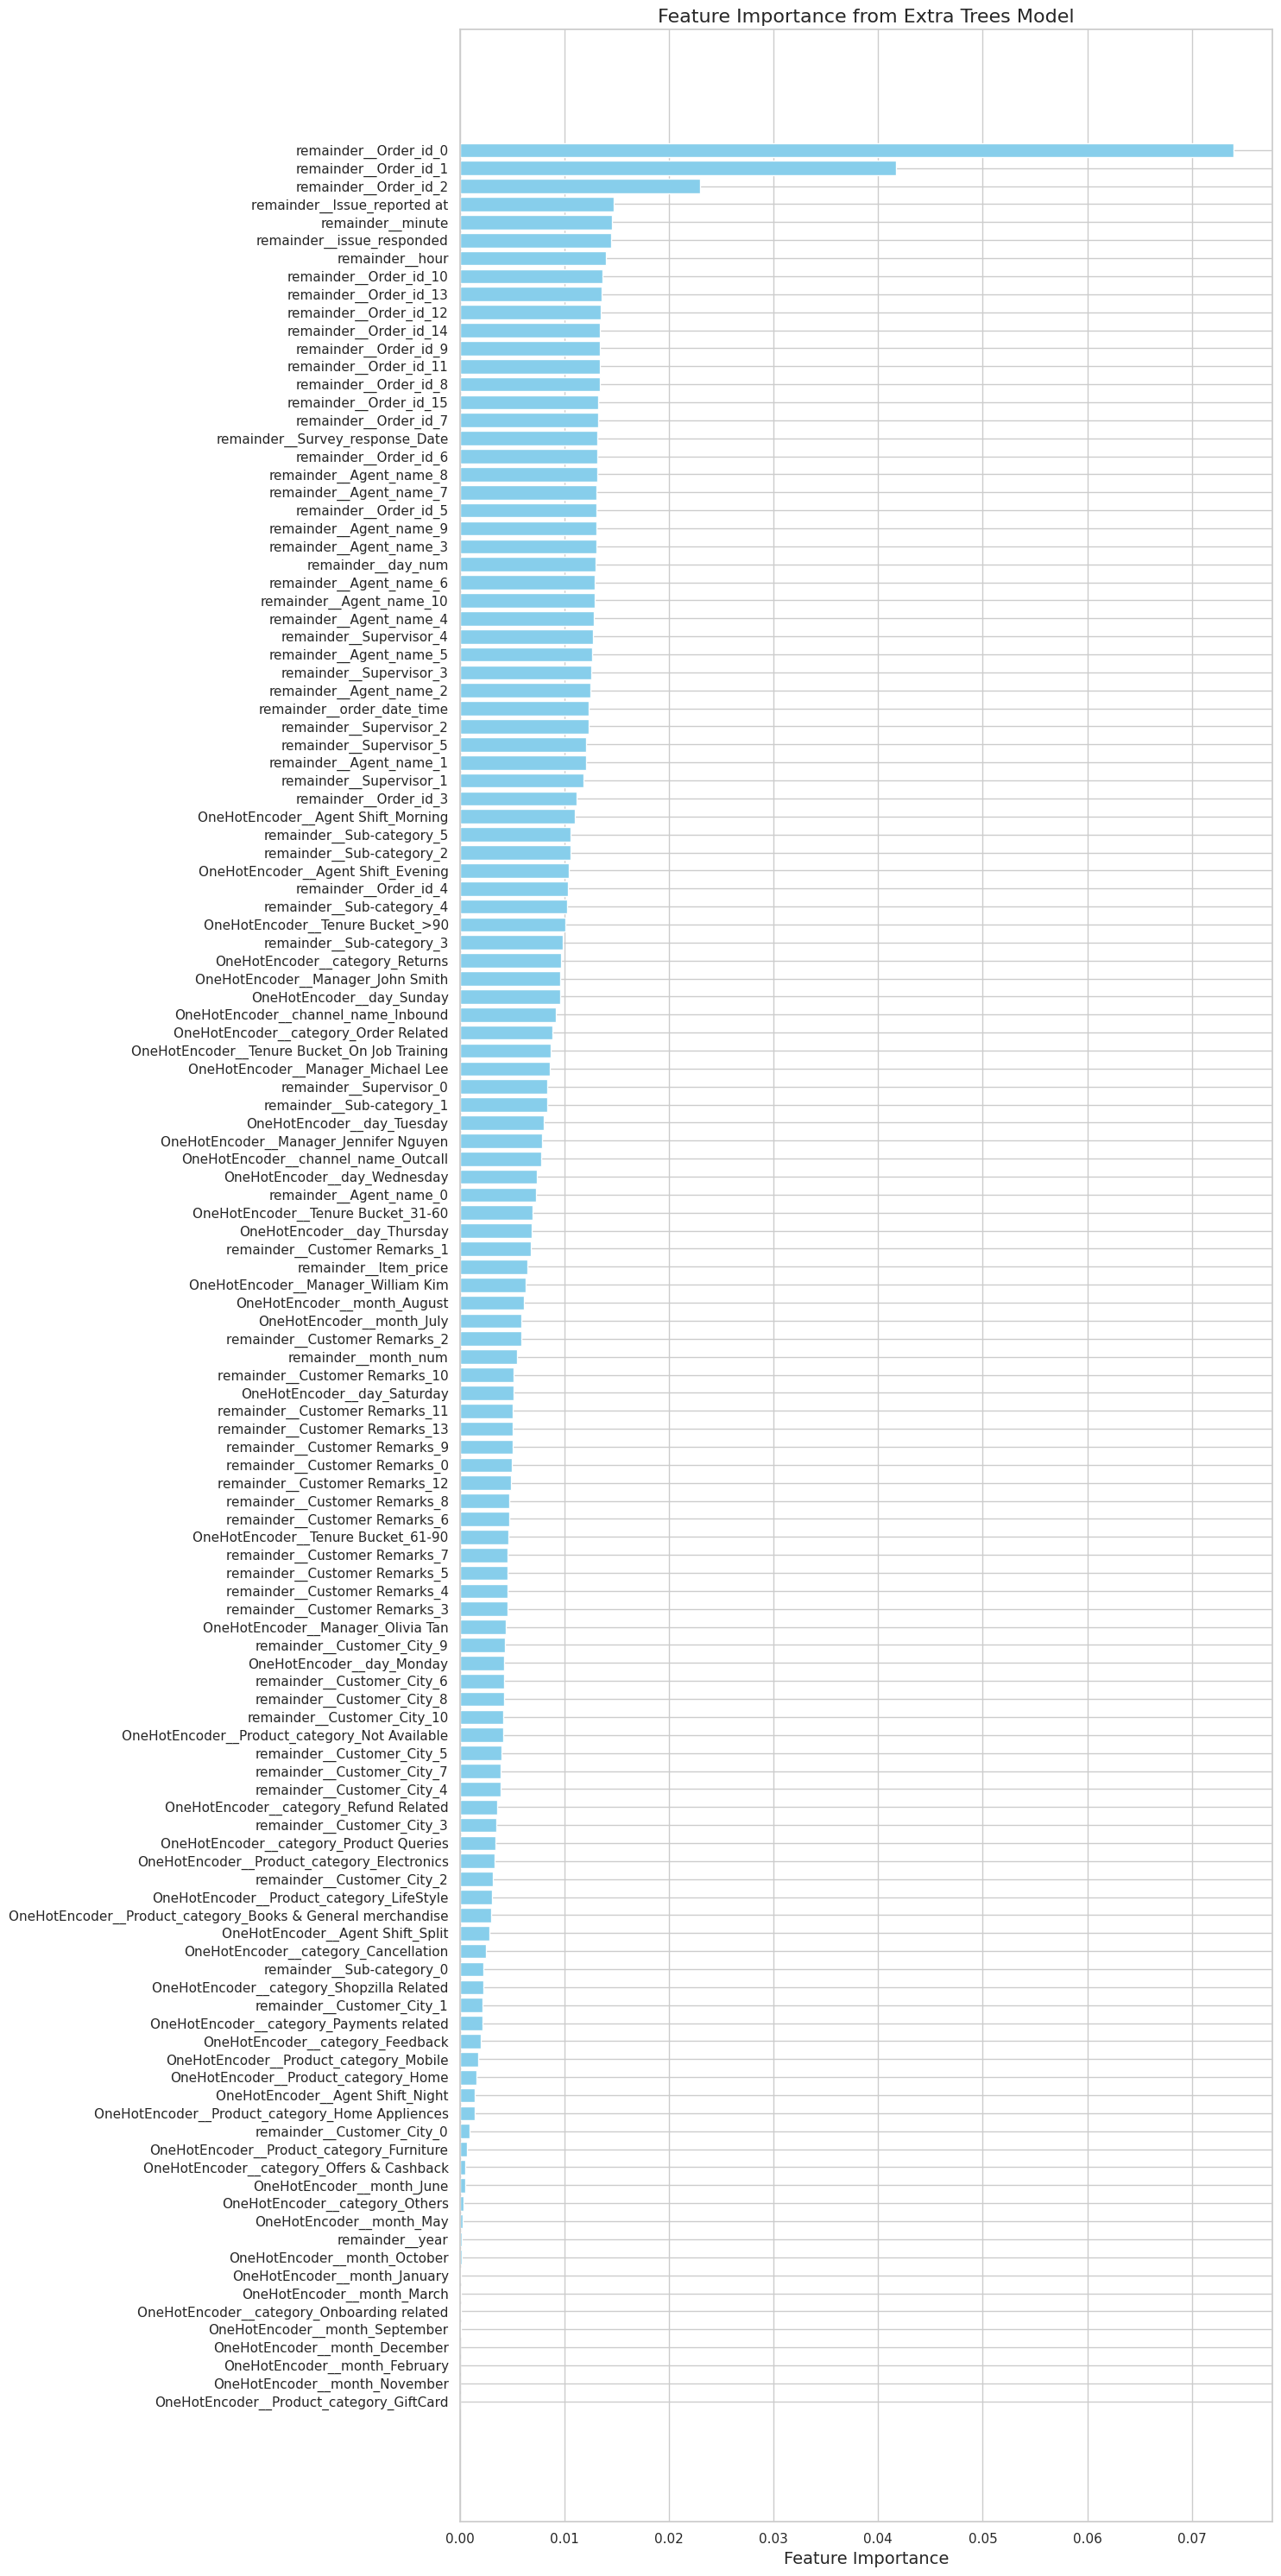

In [ ]:
# Creating feature importance DataFrame
feature_df = pd.DataFrame({
    'feature_name': X_train.columns,
    'feature_importance': model_3.feature_importances_
})

# Sort the DataFrame by feature importance
feature_df = feature_df.sort_values(by='feature_importance', ascending=False)

# Adjust the figure size for 126 features
plt.figure(figsize=(15, 30))  # Adjusted height for 126 features

# Create the horizontal bar plot
plt.barh(feature_df['feature_name'], feature_df['feature_importance'], color='skyblue')

# Labeling and title
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Feature Importance from Extra Trees Model', fontsize=16)
plt.gca().invert_yaxis()  # Most important feature on top

# Adjust margins to reduce the whitespace on the left
plt.subplots_adjust(left=0.3)  # Increase left margin to reduce whitespace

# Improving the layout
plt.tight_layout()

# Display the plot
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answere Here.

1. Issue Responded At: The feature "issue_responded_at" has a high importance score, indicating that it is a strong predictor of the CSAT (Customer Satisfaction) score. This suggests that the timeliness of addressing customer issues significantly impacts their satisfaction.

2. Survey Response Date: The feature "survey_response_date" also plays a crucial role in predicting the CSAT score, suggesting that customer satisfaction is closely linked to when the feedback is provided.

3. Order ID: Although "Order_id" may not directly influence customer satisfaction, its presence helps track and associate specific customer orders with their corresponding feedback, which could be useful for analysis and identifying trends across different orders.

## **Conclusion**

In this classification project, I have successfully implemented various machine learning models to predict customer satisfaction (CSAT) scores. After evaluating multiple algorithms, I have selected the Extra Trees model as the final choice due to its exceptional performance metrics, including high accuracy, recall, precision, and F1-score.

The analysis included assessing feature importance, revealing insights into which features significantly influence CSAT predictions. The project demonstrated the effectiveness of model selection and feature analysis in enhancing predictive capabilities. Overall, this classification project not only provided valuable predictions for customer satisfaction but also highlighted the importance of careful model evaluation and feature engineering in achieving robust outcomes.